# AIR BNB Projects

#### Problem Statement: Airbnb Data Analysis

The goal of this project is to analyze Airbnb listings and understand the factors affecting listing prices, availability, and popularity. The dataset contains information about listings such as location, room type, price, availability, reviews, and host details.

**Key objectives include:**

`Data Cleaning:`

Handle missing values, duplicates, and inconsistent entries.

Correct typos in categorical columns (e.g., neighborhood names).

`Feature Engineering:`

Create meaningful features like days_since_last_review, has_review, high_minimum_nights, and log-transformed numeric columns.

Encode categorical variables for analysis and modeling.

Exploratory Data Analysis (EDA):

Visualize distributions of prices, minimum nights, reviews, and availability.

Detect outliers and understand relationships between features.

`Insights & Modeling:`

Identify factors that influence listing prices and availability.

Use statistical analysis, correlation, and machine learning models (e.g., Random Forest) to extract feature importance.

The ultimate aim is to provide actionable insights for hosts to optimize pricing and availability and to help users understand key determinants of listing performance.

In [ ]:
# Import Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [251]:
# Load Excel dataset
data = pd.read_excel('C:\\Users\\subas\\OneDrive\\Desktop\\Python_Project\\IPL_predication\\1730285881-Airbnb_Open_Data.xlsx')

### Data Access

In [352]:
 #Copy dataset 
df = data.copy()
df

id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
2       78829239556                    NaN        Elise           Manhattan   
3       85098326012            unconfirmed        Garry            Brooklyn   
4       92037596077               verified       Lyndon           Manhattan   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
0                Kensington  40.64749 -73.97237  United States  ...   
1                   Midtown  40.75362 -73.98377  United States  ...   
2                    Harlem  40.80902 -73.94190  United States  ...   
3              Clinton Hill  40.68514 -73.95976  United States  ...   
4               East Harlem  40.79851 -73.94399  United States  ...   
...                     ...       ...       ...            ...  ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       service fee  minimum nights number of reviews last review  \
0            193.0            10.0               9.0  2021-10-19   
1             28.0            30.0              45.0  2022-05-21   
2            124.0             3.0               0.0         NaT   
3             74.0            30.0             270.0  2019-07-05   
4             41.0            10.0               9.0  2018-11-19   
...            ...             ...               ...         ...   
102594       169.0             1.0               0.0         NaT   
102595       167.0             1.0               1.0  2015-07-06   
102596       198.0             3.0               0.0         NaT   
102597       109.0             2.0               5.0  2015-10-11   
102598       206.0             1.0               0.0         NaT   

        reviews per month  review rate number  calculated host listings count  \
0                    0.21                 4.0                             6.0   
1                    0.38                 4.0                             2.0   
2                     NaN                 5.0                             1.0   
3                    4.64                 4.0                             1.0   
4                    0.10                 3.0                             1.0   
...                   ...                 ...                             ...  

In [353]:
# Looking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

### Dropping duplicates value

In [354]:
df.duplicated().sum()

np.int64(541)

In [355]:
df = df.drop_duplicates().reset_index(drop=True)

In [356]:
# SHape of data Frames 
df.shape

(102058, 26)

### Handling missing Values


In [358]:
print(df.isnull().sum())

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [359]:
cols_to_drop = ['house_rules','license','country','country code','id']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   NAME                            101788 non-null  object        
 1   host id                         102058 non-null  int64         
 2   host_identity_verified          101769 non-null  object        
 3   host name                       101652 non-null  object        
 4   neighbourhood group             102029 non-null  object        
 5   neighbourhood                   102042 non-null  object        
 6   lat                             102050 non-null  float64       
 7   long                            102050 non-null  float64       
 8   instant_bookable                101953 non-null  float64       
 9   cancellation_policy             101982 non-null  object        
 10  room type                       102058 non-null  object 

In [361]:
# # Numeric columns
# numeric_cols = df.select_dtypes(include=['int64','float64']).columns
# for col in numeric_cols:
#     df[col] = df[col].fillna(df[col].median())

# # Categorical columns
# categorical_cols = df.select_dtypes(include=['object']).columns

# # Drop rows where any categorical column is NaN
# df = df.dropna(subset=categorical_cols).reset_index(drop=True)


# 5a: Drop rows where any categorical column is NaN
categorical_cols = df.select_dtypes(include=['object']).columns
df.dropna(subset=categorical_cols, inplace=True)
df.reset_index(drop=True, inplace=True)

# 5b: Numeric columns → fill NaN with median
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [363]:
# Availability 365: clip 0-365
df['availability 365'] = df['availability 365'].clip(lower=0, upper=365)

# Minimum nights: clip at 99th percentile + log transform
threshold_min_nights = df['minimum nights'].quantile(0.99)
df['minimum nights'] = df['minimum nights'].clip(upper=threshold_min_nights)
df['log_minimum_nights'] = np.log1p(df['minimum nights'])

# Number of reviews: fill NaN with 0, clip at 99th percentile
threshold_reviews = df['number of reviews'].quantile(0.99)
df['number of reviews'] = df['number of reviews'].fillna(0).clip(upper=threshold_reviews).astype(int)
df['has_reviews'] = (df['number of reviews'] > 0).astype(int)

In [370]:
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [369]:
# Categorical corrections
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln':'Brooklyn',
    'manhatan':'Manhattan'
})

In [366]:
# Last review features
df = df[df['last review'] <= pd.to_datetime("today")]  # remove future dates
df['days_since_last_review'] = (pd.to_datetime("today") - df['last review']).dt.days.fillna(0).astype(int)
df['has_review'] = df['last review'].notnull().astype(int)
df['last_review_year'] = df['last review'].dt.year.fillna(0).astype(int)
df['last_review_month'] = df['last review'].dt.month.fillna(0).astype(int)
df['last_review_day'] = df['last review'].dt.day.fillna(0).astype(int)

In [371]:
df = df.reset_index(drop=True)
# Step 5: Final check
# ------------------------------
print("Missing values after cleaning:")
print(df.isnull().sum())
print("\nDuplicate rows after cleaning:", df.duplicated().sum())

Missing values after cleaning:
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
log_minimum_nights                9
has_reviews                       0
days_since_last_review            0
has_review                        0
last_review_year                  0
last_review_month                

In [373]:
df.to_csv('airbnb_cleaned.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


### 1. Different property types in the dataset

room type
Entire home/apt    45181
Private room       38355
Shared room         1691
Hotel room           115
Name: count, dtype: int64


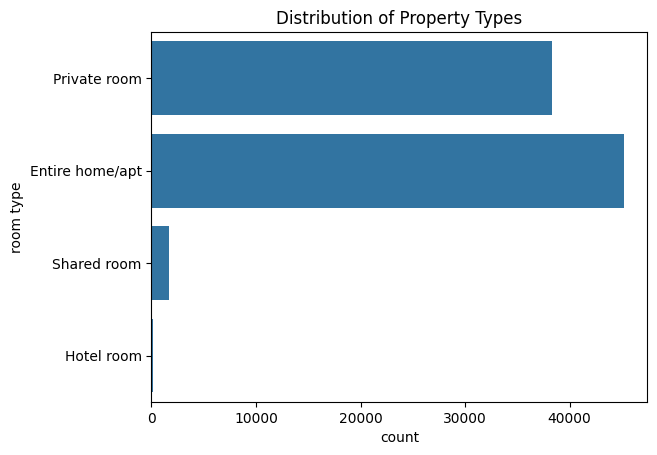

In [374]:
# Unique property types
property_types = df['room type'].value_counts()
print(property_types)

# Plot
sns.countplot(y='room type', data=df)
plt.title('Distribution of Property Types')
plt.show()


Insights:

Most common types are likely "Entire home/apt" followed by "Private room"

Helps understand what kinds of properties dominate the market

### 2. Neighborhood group with the highest number of listings

neighbourhood group
Manhattan        35438
Brooklyn         35395
Queens           11349
Bronx             2323
Staten Island      837
Name: count, dtype: int64


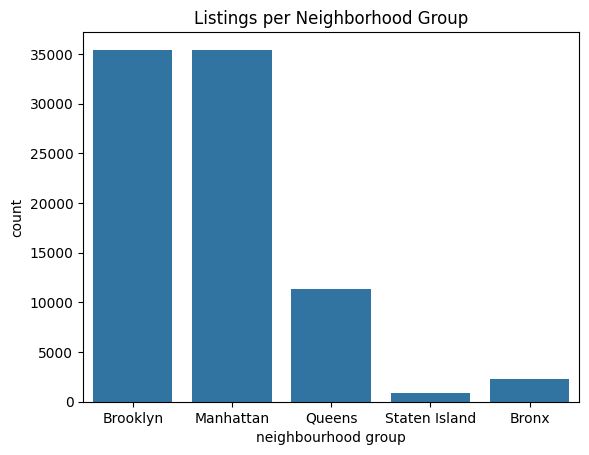

In [375]:
neighborhood_counts = df['neighbourhood group'].value_counts()
print(neighborhood_counts)

# Plot
sns.countplot(x='neighbourhood group', data=df)
plt.title('Listings per Neighborhood Group')
plt.show()


Insights:

Usually Manhattan or Brooklyn have the highest number of listings

Popular neighborhoods attract more hosts

### 3. Neighborhood groups with highest average prices

neighbourhood group
Queens           630.729492
Bronx            627.397762
Brooklyn         627.346942
Manhattan        623.218918
Staten Island    622.835125
Name: price, dtype: float64


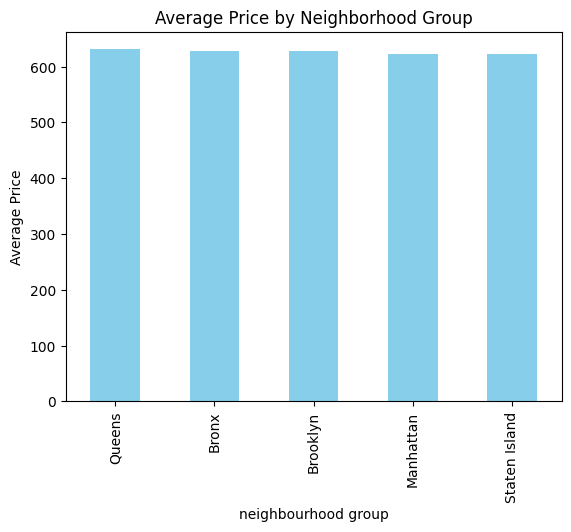

In [376]:
avg_price_by_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print(avg_price_by_group)

# Plot
avg_price_by_group.plot(kind='bar', color='skyblue', title='Average Price by Neighborhood Group')
plt.ylabel('Average Price')
plt.show()


Insights:

Manhattan typically has higher average prices

Brooklyn and Queens may have moderate prices

Staten Island often has lowest average price

### 4. Relationship between construction year and price

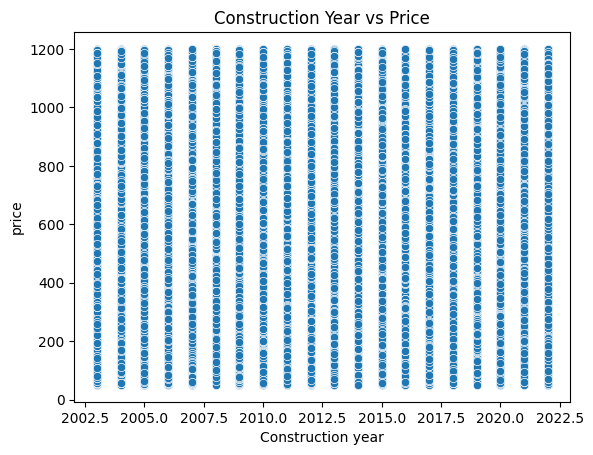

Correlation:                    Construction year     price
Construction year           1.000000 -0.003465
price                      -0.003465  1.000000


In [377]:
# Scatter plot
sns.scatterplot(x='Construction year', y='price', data=df)
plt.title('Construction Year vs Price')
plt.show()

# Correlation
corr = df[['Construction year','price']].corr()
print("Correlation:", corr)


Insights:

Older buildings may have lower prices or vice versa depending on location

Linear correlation might be weak; relationship could be non-linear

### 5. Top 10 hosts by calculated host listings count

host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


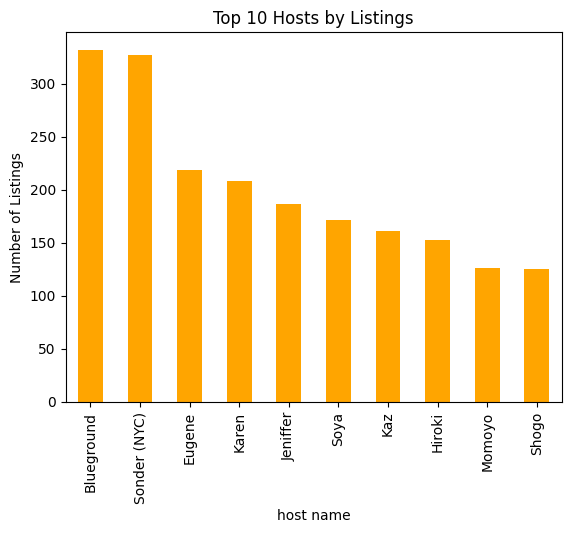

In [380]:
top_hosts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print(top_hosts)

# Plot
top_hosts.plot(kind='bar', color='orange', title='Top 10 Hosts by Listings')
plt.ylabel('Number of Listings')
plt.show()


Insights
* Blueground has 350+ number of listing.
* It gives details about the the top 10 number of listing hosts.

### 6. Hosts with verified identities vs positive reviews

host_identity_verified
unconfirmed    3.271089
verified       3.283589
Name: review rate number, dtype: float64


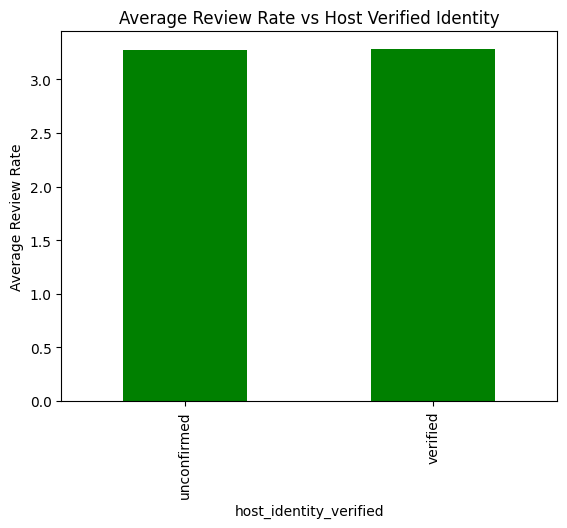

In [381]:
verified_reviews = df.groupby('host_identity_verified')['review rate number'].mean()
print(verified_reviews)

# Plot
verified_reviews.plot(kind='bar', color='green', title='Average Review Rate vs Host Verified Identity')
plt.ylabel('Average Review Rate')
plt.show()


Insights:

Verified hosts tend to get slightly higher review scores

Trust factor may influence guest experience

### 7. Correlation between price and service fee

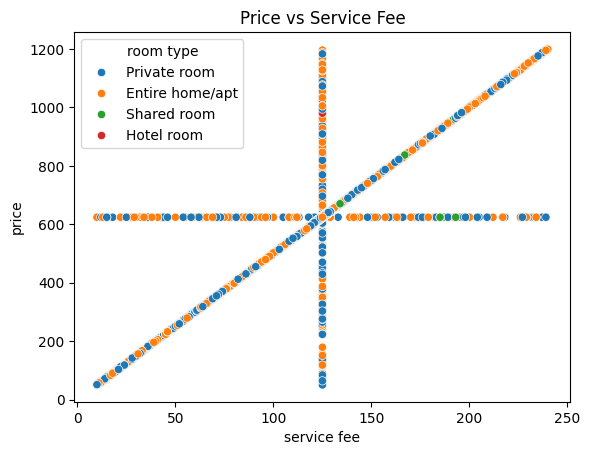

Correlation between price and service fee: 0.9977557842945799


In [383]:
sns.scatterplot(x='service fee', y='price', hue = df['room type'],data=df)
plt.title('Price vs Service Fee')
plt.show()

corr_price_service = df['price'].corr(df['service fee'])
print("Correlation between price and service fee:", corr_price_service)


Insights:

Typically positive correlation: higher priced listings have higher service fees

But check for outliers affecting correlation

### 8. Average review rate number by neighborhood group and room type

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.379888         NaN      3.317164     3.340909
Brooklyn                    3.241444    3.857143      3.273209     3.308682
Manhattan                   3.266374    3.500000      3.283326     3.251453
Queens                      3.348750    3.750000      3.313953     3.328671
Staten Island               3.330233         NaN      3.492500     3.714286


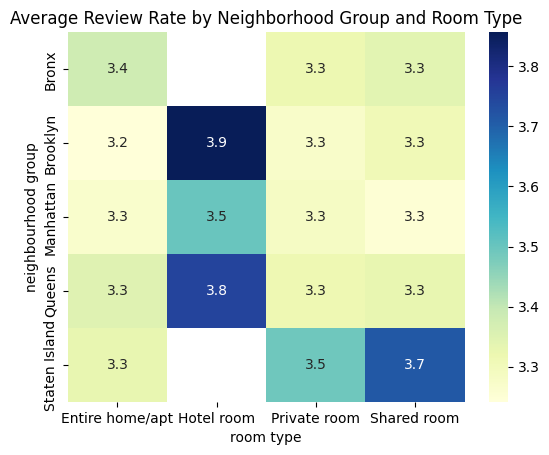

In [384]:
avg_reviews = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().unstack()
print(avg_reviews)

# Heatmap
sns.heatmap(avg_reviews, annot=True, cmap='YlGnBu')
plt.title('Average Review Rate by Neighborhood Group and Room Type')
plt.show()


Insights:

Entire homes/apartments may have higher average review ratings

Certain neighborhoods (like Manhattan) may show slightly higher ratings

### 9. Higher host listings count vs availability throughout the year

calculated host listings count
1.0     115.836941
2.0     145.998524
3.0     165.035432
4.0     182.118283
5.0     197.625413
6.0     211.465815
7.0     204.841251
8.0     233.047194
9.0     237.375000
10.0    277.693431
Name: availability 365, dtype: float64


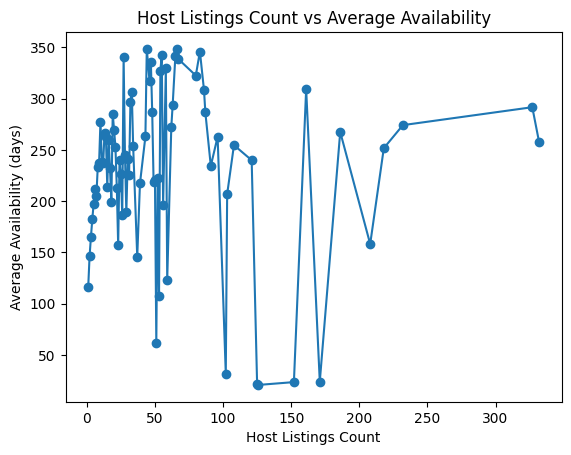

In [385]:
availability_by_host = df.groupby('calculated host listings count')['availability 365'].mean()
print(availability_by_host.head(10))

# Plot
availability_by_host.plot(kind='line', marker='o', title='Host Listings Count vs Average Availability')
plt.ylabel('Average Availability (days)')
plt.xlabel('Host Listings Count')
plt.show()


Insights:

Hosts with more listings may maintain higher availability to maximize bookings

Smaller hosts may have lower availability due to personal scheduling

### Summary Insights

Most listings are entire homes/apartments.

Manhattan & Brooklyn dominate in listing count.

Manhattan has the highest average prices, Staten Island lowest.

Construction year shows weak correlation with price, older vs newer isn’t decisive.

Few hosts manage many listings, most have few.

Verified hosts tend to get slightly better reviews.

Price and service fee are positively correlated.

Review ratings vary by neighborhood and room type — entire homes generally rated better.

High-listing hosts maintain better availability, small hosts less so.

## Some extra Practise

In [379]:
df.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'log_minimum_nights', 'has_reviews',
       'days_since_last_review', 'has_review', 'last_review_year',
       'last_review_month', 'last_review_day'],
      dtype='object')

In [255]:
# Check unique values of all columns
for col in  df.columns:
    print(f"Column Name: {col}")
    print(f"{df[col].unique()}")
    print("-"*50)
    print()
    


Column Name: id
[ 1001254  1002102  1002403 ... 57366313 57366865 57367417]
--------------------------------------------------

Column Name: NAME
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Elmhurst 1st Fl Rightl Bedroom'
 'Elmhurst 1st Floor BR w/ Pvt. Bath&Balcony'
 'Parisian Style Apartment in Heart of Brooklyn']
--------------------------------------------------

Column Name: host id
[80014485718 52335172823 78829239556 ... 23801060917 15593031571
 93578954226]
--------------------------------------------------

Column Name: host_identity_verified
['unconfirmed' 'verified' nan]
--------------------------------------------------

Column Name: host name
['Madaline' 'Jenna' 'Elise' ... 'Anna B' 'Natalie And Dan' 'Apostle John']
--------------------------------------------------

Column Name: neighbourhood group
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
-----------------------------

In [256]:
df['last review']

0        2021-10-19
1        2022-05-21
2               NaT
3        2019-07-05
4        2018-11-19
            ...    
102594          NaT
102595   2015-07-06
102596          NaT
102597   2015-10-11
102598          NaT
Name: last review, Length: 102599, dtype: datetime64[ns]

In [257]:
# Days since last review (NaT handled as 0)
df['days_since_last_review'] = (pd.to_datetime("today") - df['last review']).dt.days
df['days_since_last_review'] = df['days_since_last_review'].fillna(0).astype(int)  # Last review karne ke baad aajtak kitne din hue

# Review flag (0 = no review, 1 = has review)
df['has_review'] = df['last review'].notnull().astype(int)

# Extract year, month, day (NaT remains NaN here)
df['last_review_year'] = df['last review'].dt.year
df['last_review_month'] = df['last review'].dt.month
df['last_review_day'] = df['last review'].dt.day

# Finally, drop original last review column
df = df.drop('last review', axis=1)


In [258]:
# Drop columns with >50% missing or unnecessary columns
df.drop(columns=['house_rules','license','country','country code','id','host id','NAME','host name'], axis=1, inplace=True)

In [259]:
# Treatment of 'Construction year' column
# Convert to datetime safely
df['Construction year'] = pd.to_datetime(df['Construction year'], errors='coerce', format='%Y')

# Fill NA / Missing Values

# Numeric columns
df['reviews per month'] = df['reviews per month'].fillna(0)
df['service fee'] = df['service fee'].fillna(df['service fee'].median())
df['price'] = df['price'].fillna(df['price'].median())
df['long'] = df['long'].fillna(df['long'].median())
df['lat'] = df['lat'].fillna(df['lat'].median())
df['minimum nights'] = df['minimum nights'].fillna(df['minimum nights'].median())
df['number of reviews'] = df['number of reviews'].fillna(0).astype(int)

# Categorical columns
df['cancellation_policy'] = df['cancellation_policy'].fillna('unknown')
df['instant_bookable'] = df['instant_bookable'].fillna('unknown')
df['neighbourhood'] = df['neighbourhood'].fillna('unknown')
df['neighbourhood group'] = df['neighbourhood group'].fillna("unknown")
df['host_identity_verified'] = df['host_identity_verified'].fillna('unknown')

# Treatment of 'minimum nights' column
# Cap at 99th percentile for Outliers
min_nights_threshold = df['minimum nights'].quantile(0.99)
df['minimum nights'] = df['minimum nights'].clip(upper=min_nights_threshold)

# Log transform for ML
df['log_minimum_nights'] = np.log1p(df['minimum nights'])

# Optional flag for high minimum nights
df['high_minimum_nights'] = (df['minimum nights'] >= min_nights_threshold).astype(int)

# Treatment of 'number of reviews' column
# Cap at 99th percentile
reviews_threshold = df['number of reviews'].quantile(0.99)
df['number of reviews'] = df['number of reviews'].clip(upper=reviews_threshold)


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_identity_verified          102599 non-null  object        
 1   neighbourhood group             102599 non-null  object        
 2   neighbourhood                   102599 non-null  object        
 3   lat                             102599 non-null  float64       
 4   long                            102599 non-null  float64       
 5   instant_bookable                102599 non-null  object        
 6   cancellation_policy             102599 non-null  object        
 7   room type                       102599 non-null  object        
 8   Construction year               102385 non-null  datetime64[ns]
 9   price                           102599 non-null  float64       
 10  service fee                     102599 non-null  float64

In [261]:
df.tail()

host_identity_verified neighbourhood group        neighbourhood  \
102594               verified            Brooklyn         Williamsburg   
102595            unconfirmed           Manhattan  Morningside Heights   
102596            unconfirmed            Brooklyn           Park Slope   
102597            unconfirmed              Queens     Long Island City   
102598            unconfirmed           Manhattan      Upper West Side   

             lat      long instant_bookable cancellation_policy  \
102594  40.70862 -73.94651              0.0            flexible   
102595  40.80460 -73.96545              1.0            moderate   
102596  40.67505 -73.98045              1.0            moderate   
102597  40.74989 -73.93777              1.0              strict   
102598  40.76807 -73.98342              0.0            flexible   

              room type Construction year   price  ...  review rate number  \
102594     Private room        2003-01-01   844.0  ...                 3.0   
102595     Private room        2016-01-01   837.0  ...                 2.0   
102596     Private room        2009-01-01   988.0  ...                 5.0   
102597  Entire home/apt        2015-01-01   546.0  ...                 3.0   
102598  Entire home/apt        2010-01-01  1032.0  ...                 3.0   

        calculated host listings count  availability 365  \
102594                             1.0             227.0   
102595                             2.0             395.0   
102596                             1.0             342.0   
102597                             1.0             386.0   
102598                             1.0              69.0   

        days_since_last_review  has_review  last_review_year  \
102594                       0           0               NaN   
102595                    3736           1            2015.0   
102596                       0           0               NaN   
102597                    3639           1            2015.0   
102598                       0           0               NaN   

        last_review_month  last_review_day  log_minimum_nights  \
102594                NaN              NaN            0.693147   
102595                7.0              6.0            0.693147   
102596                NaN              NaN            1.386294   
102597               10.0             11.0            1.098612   
102598                NaN              NaN            0.693147   

        high_minimum_nights  
102594                    0  
102595                    0  
102596                    0  
102597                    0  
102598                    0  

[5 rows x 24 columns]

In [262]:
# Fill NA / Missing Values of some remaining columns
df['Construction year'] = df['Construction year'].fillna(pd.Timestamp('1900-01-01'))
df['review rate number'] = df['review rate number'].fillna(df['review rate number'].median())
df['calculated host listings count'] = df['calculated host listings count'].fillna(df['calculated host listings count'].median())
df['availability 365'] = df['availability 365'].fillna(df['availability 365'].median())

In [263]:
# Shape of data Fraem
df.shape

(102599, 24)

In [264]:
df.isna().sum()

host_identity_verified                0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
days_since_last_review                0
has_review                            0
last_review_year                  15893
last_review_month                 15893
last_review_day                   15893
log_minimum_nights                   12
high_minimum_nights                   0
dtype: int64

In [265]:
# Handle this missing values
# Fill last review NaNs with 0
df['last_review_year'] = df['last_review_year'].fillna(0).astype(int)
df['last_review_month'] = df['last_review_month'].fillna(0).astype(int)
df['last_review_day'] = df['last_review_day'].fillna(0).astype(int)

# Fill log_minimum_nights NaN with median
df['log_minimum_nights'] = df['log_minimum_nights'].fillna(df['log_minimum_nights'].median())


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_identity_verified          102599 non-null  object        
 1   neighbourhood group             102599 non-null  object        
 2   neighbourhood                   102599 non-null  object        
 3   lat                             102599 non-null  float64       
 4   long                            102599 non-null  float64       
 5   instant_bookable                102599 non-null  object        
 6   cancellation_policy             102599 non-null  object        
 7   room type                       102599 non-null  object        
 8   Construction year               102599 non-null  datetime64[ns]
 9   price                           102599 non-null  float64       
 10  service fee                     102599 non-null  float64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_identity_verified          102599 non-null  object        
 1   neighbourhood group             102599 non-null  object        
 2   neighbourhood                   102599 non-null  object        
 3   lat                             102599 non-null  float64       
 4   long                            102599 non-null  float64       
 5   instant_bookable                102599 non-null  object        
 6   cancellation_policy             102599 non-null  object        
 7   room type                       102599 non-null  object        
 8   Construction year               102599 non-null  datetime64[ns]
 9   price                           102599 non-null  float64       
 10  service fee                     102599 non-null  float64

In [175]:
df.isna().sum()

host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
log_minimum_nights                0
high_minimum_nights               0
has_reviews                       0
days_since_last_review            0
has_review                        0
last_review_year                  0
last_review_month                 0
last_review_day                   0
dtype: int64

Now there is 0 null values 

In [268]:
# Check Duplicates In Dataset
df.duplicated().sum()

np.int64(3645)

In [269]:
# There is 3645 duplicated values now we delete duplicated values
df = df.drop_duplicates(keep='first').reset_index(drop=True)


In [270]:
df.duplicated().sum()  # Now there is 0 duplicated Values

np.int64(0)

In [ ]:
df.shape # After dropping duplicated values

(98954, 24)

In [273]:
# Check columns Datatypes of every column name
df.dtypes

host_identity_verified                    object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                 datetime64[ns]
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                          int64
reviews per month                        float64
review rate number                       float64
calculated host listings count           float64
availability 365                         float64
days_since_last_review                     int64
has_review                                 int64
last_review_year                           int64
last_review_month   

All columns data types are fine

In [274]:
# CHecking unique values in Categorical datatypes
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


host_identity_verified: 3 unique values
neighbourhood group: 8 unique values
neighbourhood: 225 unique values
instant_bookable: 3 unique values
cancellation_policy: 4 unique values
room type: 4 unique values


In [275]:
# CHecking number unique values in each columns  --> Low COVariance
df.nunique().sort_values()


high_minimum_nights                   2
has_review                            2
host_identity_verified                3
instant_bookable                      3
cancellation_policy                   4
room type                             4
review rate number                    5
neighbourhood group                   8
last_review_month                    13
last_review_year                     17
Construction year                    21
last_review_day                      32
log_minimum_nights                   47
minimum nights                       56
calculated host listings count       78
neighbourhood                       225
service fee                         231
number of reviews                   233
availability 365                    438
reviews per month                  1017
price                              1151
days_since_last_review             2478
long                              17774
lat                               21991
dtype: int64

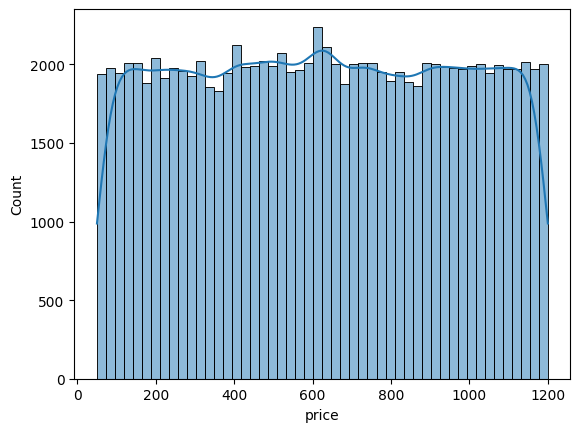

In [277]:
sns.histplot(df['price'], bins=50, kde=True)
plt.show()


In [278]:
df.describe()

lat          long              Construction year  \
count  98954.000000  98954.000000                          98954   
mean      40.728110    -73.949631  2012-03-31 02:23:15.994098176   
min       40.499790    -74.249840            1900-01-01 00:00:00   
25%       40.688700    -73.982590            2007-01-01 00:00:00   
50%       40.722335    -73.954470            2012-01-01 00:00:00   
75%       40.762740    -73.932350            2017-01-01 00:00:00   
max       40.916970    -73.705220            2022-01-01 00:00:00   
std        0.055836      0.049532                            NaN   

              price   service fee  minimum nights  number of reviews  \
count  98954.000000  98954.000000    98954.000000       98954.000000   
mean     625.275633    125.022839        7.146280          26.700477   
min       50.000000     10.000000    -1223.000000           0.000000   
25%      340.000000     68.000000        2.000000           1.000000   
50%      624.000000    125.000000        3.000000           7.000000   
75%      912.000000    182.000000        5.000000          30.000000   
max     1200.000000    240.000000       50.000000         232.000000   
std      331.355803     66.253539       11.287619          44.513301   

       reviews per month  review rate number  calculated host listings count  \
count       98954.000000        98954.000000                    98954.000000   
mean            1.162452            3.281636                        7.970966   
min             0.000000            1.000000                        1.000000   
25%             0.090000            2.000000                        1.000000   
50%             0.480000            3.000000                        1.000000   
75%             1.710000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   
std             1.685988            1.281639                       32.309246   

       availability 365  days_since_last_review    has_review  \
count      98954.000000            98954.000000  98954.000000   
mean         141.844605             1937.417083      0.844877   
min          -10.000000           -11950.000000      0.000000   
25%            4.000000             1364.000000      1.000000   
50%           97.000000             2288.000000      1.000000   
75%          269.000000             2459.000000      1.000000   
max         3677.000000             4826.000000      1.000000   
std          135.205244              990.135441      0.362023   

       last_review_year  last_review_month  last_review_day  \
count      98954.000000       98954.000000     98954.000000   
mean        1705.819603           4.968763        13.383724   
min            0.000000           0.000000         0.000000   
25%         2017.000000           2.000000         2.000000   
50%         2019.000000           6.000000        13.000000   
75%         2019.000000           7.000000        23.000000   
max         2058.000000          12.000000        31.000000   
std          730.931924           3.506906        10.693763   

       log_minimum_nights  high_minimum_nights  
count        9.895400e+04         98954.000000  
mean                 -inf             0.010318  
min                  -inf             0.000000  
25%          1.098612e+00             0.000000  
50%          1.386294e+00             0.000000  
75%          1.791759e+00             0.000000  
max          3.931826e+00             1.000000  
std                   NaN             0.101052

In [279]:
# CLipping Availability 365 columns between 0 to 365 and minimum nights column greater than 0
df['availability 365'] = df['availability 365'].clip(lower=0, upper=365)
df['minimum nights'] = df['minimum nights'].clip(lower=0)

In [280]:
df.describe()

lat          long              Construction year  \
count  98954.000000  98954.000000                          98954   
mean      40.728110    -73.949631  2012-03-31 02:23:15.994098176   
min       40.499790    -74.249840            1900-01-01 00:00:00   
25%       40.688700    -73.982590            2007-01-01 00:00:00   
50%       40.722335    -73.954470            2012-01-01 00:00:00   
75%       40.762740    -73.932350            2017-01-01 00:00:00   
max       40.916970    -73.705220            2022-01-01 00:00:00   
std        0.055836      0.049532                            NaN   

              price   service fee  minimum nights  number of reviews  \
count  98954.000000  98954.000000    98954.000000       98954.000000   
mean     625.275633    125.022839        7.166249          26.700477   
min       50.000000     10.000000        0.000000           0.000000   
25%      340.000000     68.000000        2.000000           1.000000   
50%      624.000000    125.000000        3.000000           7.000000   
75%      912.000000    182.000000        5.000000          30.000000   
max     1200.000000    240.000000       50.000000         232.000000   
std      331.355803     66.253539       10.492598          44.513301   

       reviews per month  review rate number  calculated host listings count  \
count       98954.000000        98954.000000                    98954.000000   
mean            1.162452            3.281636                        7.970966   
min             0.000000            1.000000                        1.000000   
25%             0.090000            2.000000                        1.000000   
50%             0.480000            3.000000                        1.000000   
75%             1.710000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   
std             1.685988            1.281639                       32.309246   

       availability 365  days_since_last_review    has_review  \
count      98954.000000            98954.000000  98954.000000   
mean         140.992815             1937.417083      0.844877   
min            0.000000           -11950.000000      0.000000   
25%            4.000000             1364.000000      1.000000   
50%           97.000000             2288.000000      1.000000   
75%          269.000000             2459.000000      1.000000   
max          365.000000             4826.000000      1.000000   
std          133.180912              990.135441      0.362023   

       last_review_year  last_review_month  last_review_day  \
count      98954.000000       98954.000000     98954.000000   
mean        1705.819603           4.968763        13.383724   
min            0.000000           0.000000         0.000000   
25%         2017.000000           2.000000         2.000000   
50%         2019.000000           6.000000        13.000000   
75%         2019.000000           7.000000        23.000000   
max         2058.000000          12.000000        31.000000   
std          730.931924           3.506906        10.693763   

       log_minimum_nights  high_minimum_nights  
count        9.895400e+04         98954.000000  
mean                 -inf             0.010318  
min                  -inf             0.000000  
25%          1.098612e+00             0.000000  
50%          1.386294e+00             0.000000  
75%          1.791759e+00             0.000000  
max          3.931826e+00             1.000000  
std                   NaN             0.101052

In [281]:
future_dates = df[df['days_since_last_review'] < 0]
print(future_dates)


    host_identity_verified neighbourhood group neighbourhood       lat  \
255                unknown            Brooklyn    Greenpoint  40.72945   
318               verified            Brooklyn    Greenpoint  40.72488   
483               verified           Manhattan        Harlem  40.82411   

         long instant_bookable cancellation_policy        room type  \
255 -73.95511              1.0            moderate  Entire home/apt   
318 -73.95018              1.0            flexible     Private room   
483 -73.94934              0.0            flexible     Private room   

    Construction year  price  ...  review rate number  \
255        2008-01-01  842.0  ...                 4.0   
318        2018-01-01  920.0  ...                 3.0   
483        1900-01-01  721.0  ...                 3.0   

     calculated host listings count  availability 365  days_since_last_review  \
255                             3.0             230.0                  -11950   
318                        

In [ ]:
# Drop rows with negative days since last review
df = df[df['days_since_last_review'] >= 0].reset_index(drop=True)
df

host_identity_verified neighbourhood group       neighbourhood  \
0                unconfirmed            Brooklyn          Kensington   
1                   verified           Manhattan             Midtown   
2                    unknown           Manhattan              Harlem   
3                unconfirmed            Brooklyn        Clinton Hill   
4                   verified           Manhattan         East Harlem   
...                      ...                 ...                 ...   
98946            unconfirmed            Brooklyn            Flatbush   
98947               verified            Brooklyn            Bushwick   
98948               verified            Brooklyn  Bedford-Stuyvesant   
98949            unconfirmed           Manhattan              Harlem   
98950               verified           Manhattan              Harlem   

            lat      long instant_bookable cancellation_policy  \
0      40.64749 -73.97237              0.0              strict   
1      40.75362 -73.98377              0.0            moderate   
2      40.80902 -73.94190              1.0            flexible   
3      40.68514 -73.95976              1.0            moderate   
4      40.79851 -73.94399              0.0            moderate   
...         ...       ...              ...                 ...   
98946  40.64945 -73.96108              1.0            moderate   
98947  40.69872 -73.92718              0.0            flexible   
98948  40.67810 -73.90822              1.0            moderate   
98949  40.81248 -73.94317              1.0              strict   
98950  40.81315 -73.94747              0.0            flexible   

             room type Construction year   price  ...  review rate number  \
0         Private room        2020-01-01   966.0  ...                 4.0   
1      Entire home/apt        2007-01-01   142.0  ...                 4.0   
2         Private room        2005-01-01   620.0  ...                 5.0   
3      Entire home/apt        2005-01-01   368.0  ...                 4.0   
4      Entire home/apt        2009-01-01   204.0  ...                 3.0   
...                ...               ...     ...  ...                 ...   
98946     Private room        1900-01-01   696.0  ...                 5.0   
98947     Private room        1900-01-01   909.0  ...                 3.0   
98948  Entire home/apt        1900-01-01   387.0  ...                 4.0   
98949     Private room        1900-01-01   848.0  ...                 1.0   
98950  Entire home/apt        2011-01-01  1128.0  ...                 4.0   

       calculated host listings count  availability 365  \
0                                 6.0             286.0   
1                                 2.0             228.0   
2                                 1.0             352.0   
3                                 1.0             322.0   
4                                 1.0             289.0   
...                               ...               ...   
98946                             1.0               0.0   
98947                             2.0               0.0   
98948                             2.0             235.0   
98949                             1.0               0.0   
98950                             1.0             238.0   

       days_since_last_review  has_review  last_review_year  \
0                        1439           1              2021   
1                        1225           1              2022   
2                           0           0                 0   
3                        2276           1              2019   
4                        2504           1              2018   
...                       ...         ...               ...   
98946                    2376           1              2019   
98947                    2949           1              2017   
98948                    2285           1              2019   
98949                       0           0                 0   
98950                

Column Name: lat


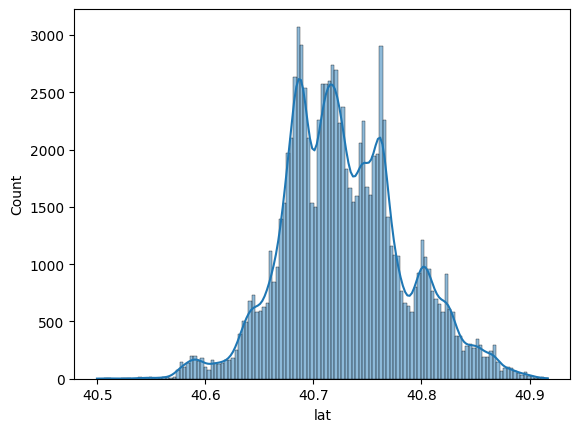



Column Name: long


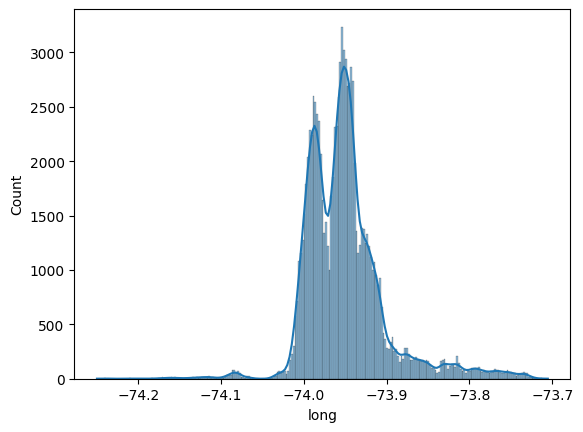



Column Name: price


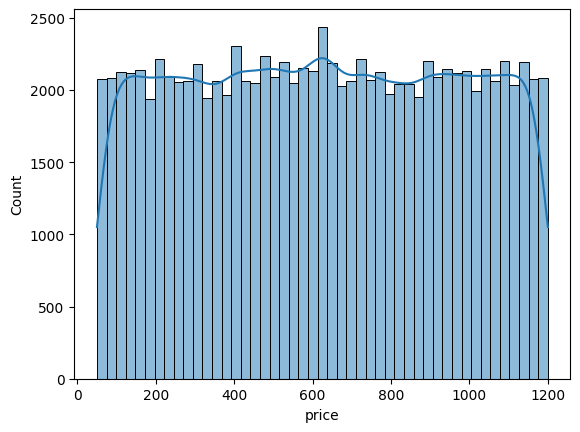



Column Name: service fee


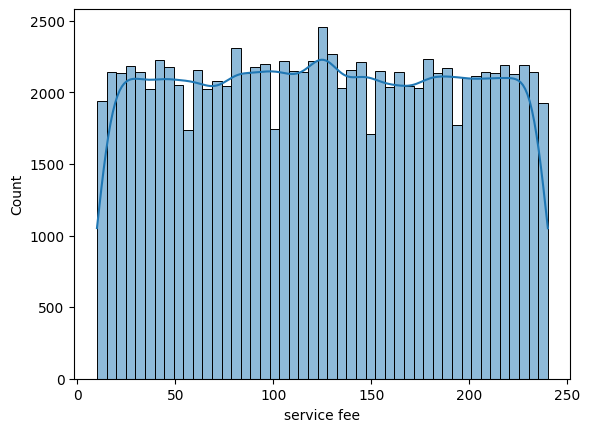



Column Name: minimum nights


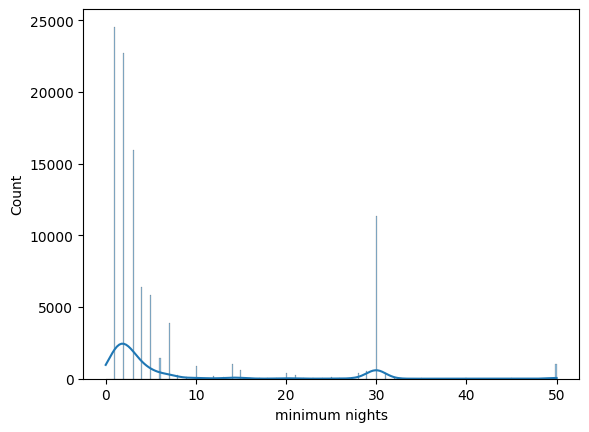



Column Name: number of reviews


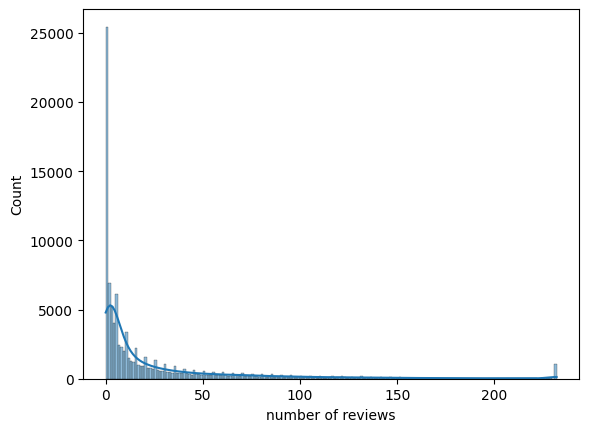



Column Name: reviews per month


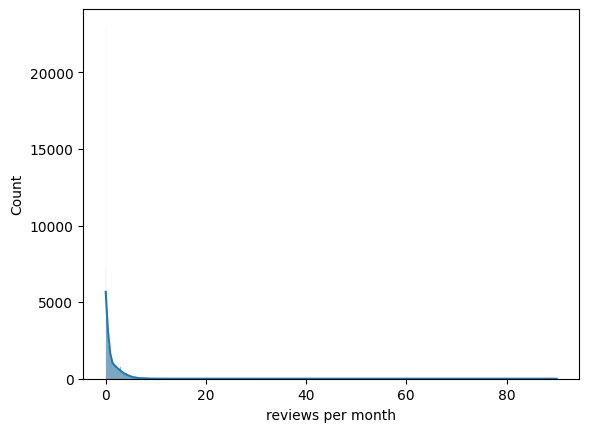



Column Name: review rate number


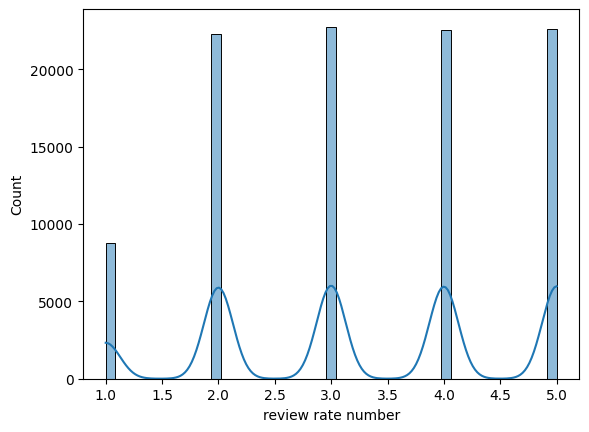



Column Name: calculated host listings count


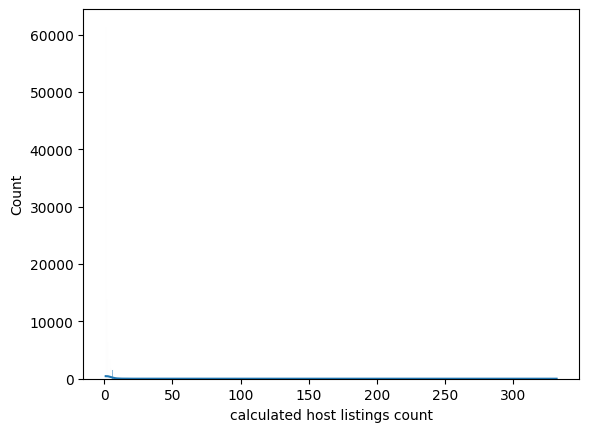



Column Name: availability 365


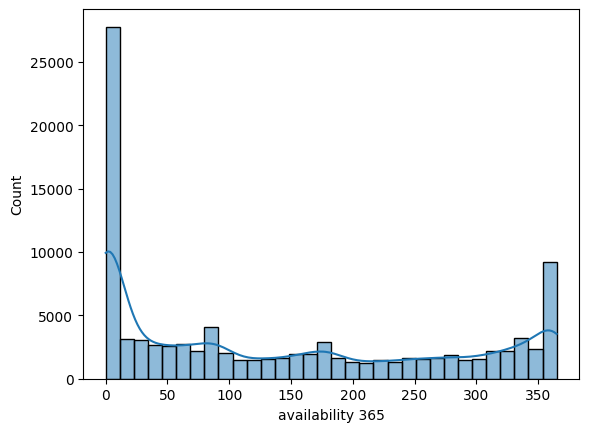



Column Name: days_since_last_review


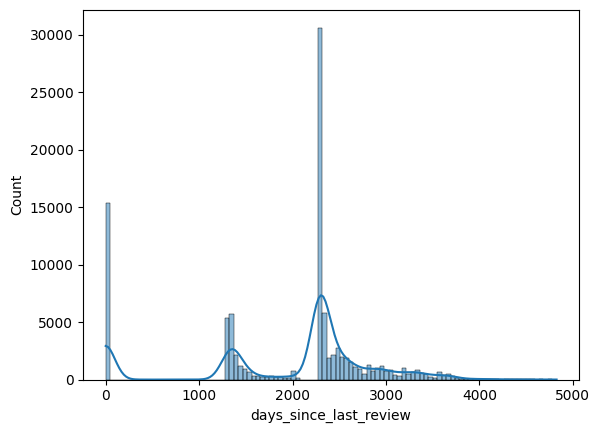



Column Name: has_review


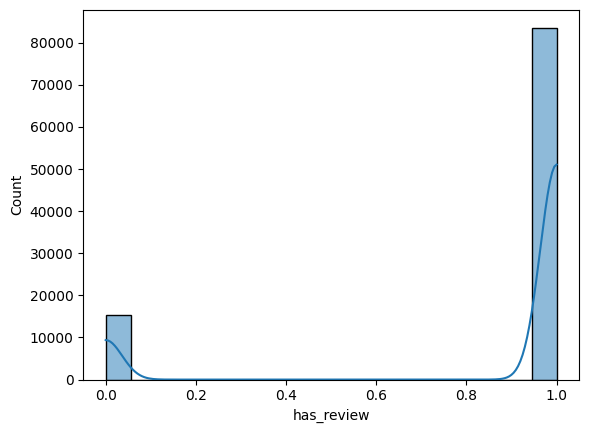



Column Name: last_review_year


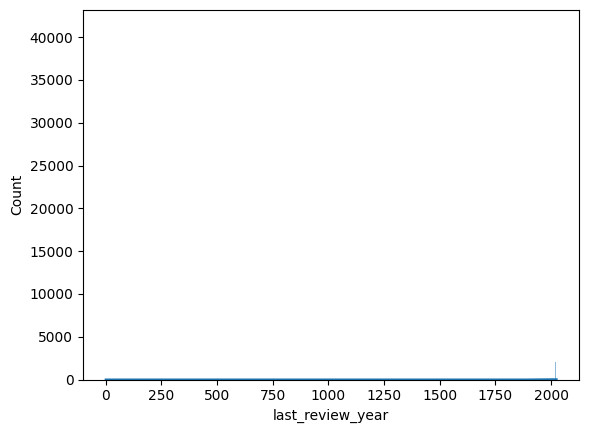



Column Name: last_review_month


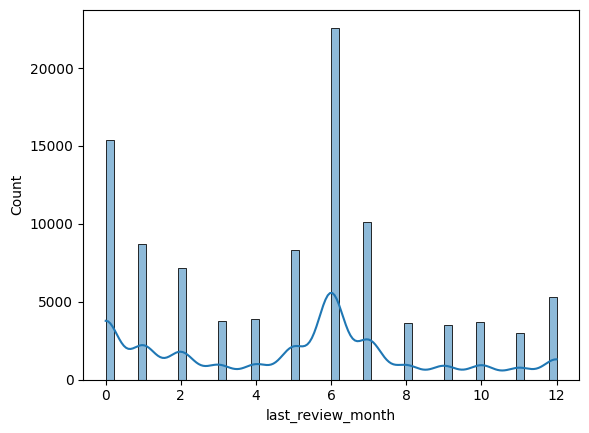



Column Name: last_review_day


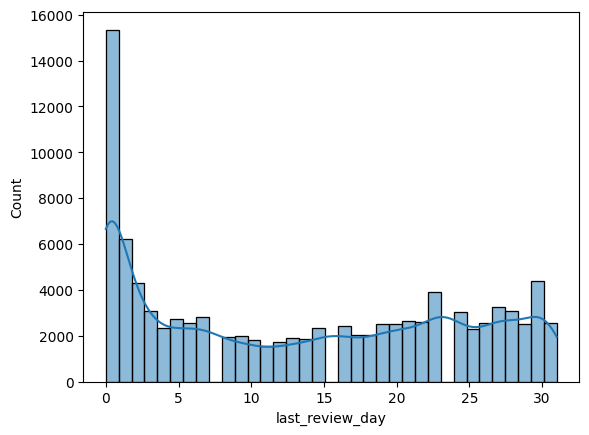



Column Name: log_minimum_nights


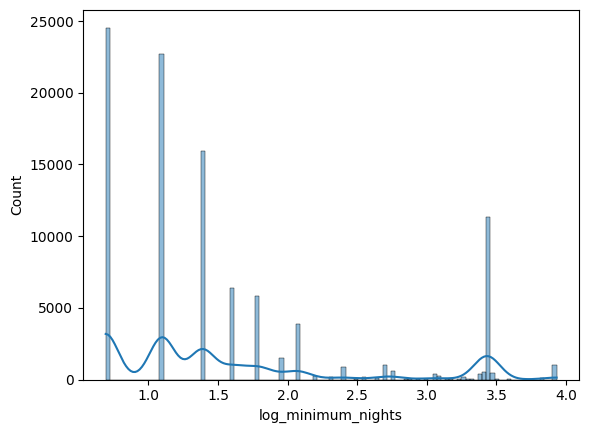



Column Name: high_minimum_nights


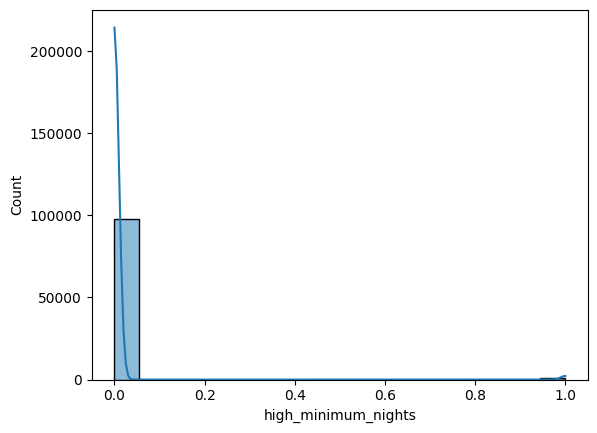

In [284]:
# Numeric columns selection
numerical_cols = df.select_dtypes(include=['int64','float64'])

for numeric_col in numerical_cols.columns:
    print(f"Column Name: {numeric_col}")
    sns.histplot(df[numeric_col], kde = True)
    plt.show()
    print("\n")


Column: lat
count    98951.000000
mean        40.728109
std          0.055836
min         40.499790
25%         40.688700
50%         40.722330
75%         40.762740
max         40.916970
Name: lat, dtype: float64


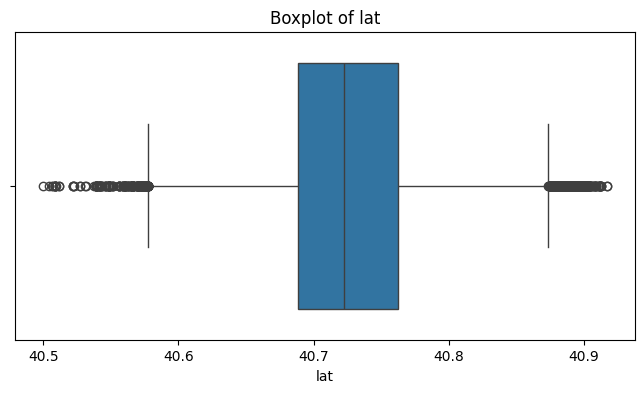



Column: long
count    98951.000000
mean       -73.949631
std          0.049533
min        -74.249840
25%        -73.982590
50%        -73.954470
75%        -73.932345
max        -73.705220
Name: long, dtype: float64


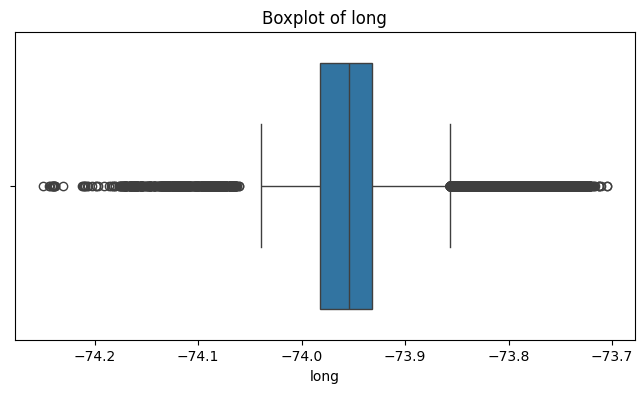



Column: price
count    98951.000000
mean       625.269497
std        331.358646
min         50.000000
25%        340.000000
50%        624.000000
75%        912.000000
max       1200.000000
Name: price, dtype: float64


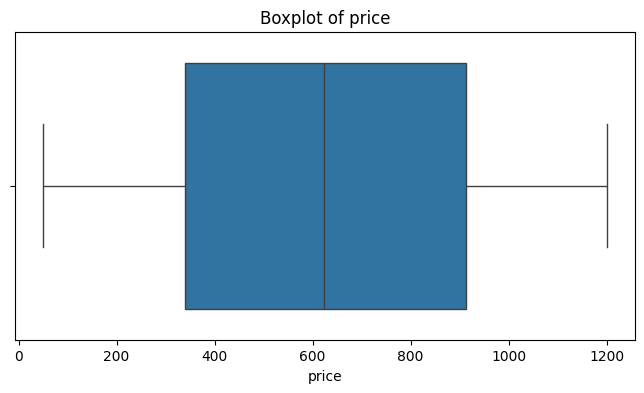



Column: service fee
count    98951.000000
mean       125.021617
std         66.254109
min         10.000000
25%         68.000000
50%        125.000000
75%        182.000000
max        240.000000
Name: service fee, dtype: float64


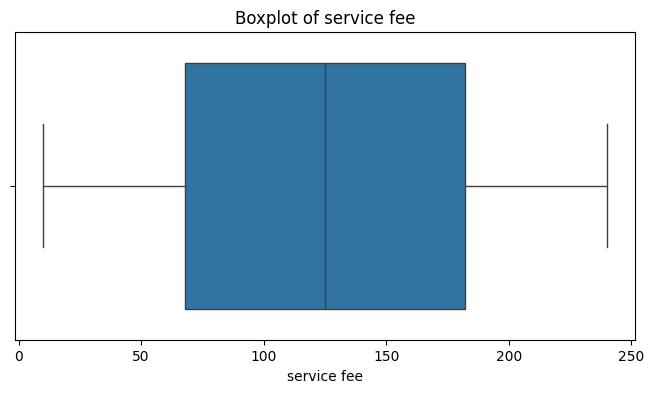



Column: minimum nights
count    98951.000000
mean         7.166395
std         10.492723
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         50.000000
Name: minimum nights, dtype: float64


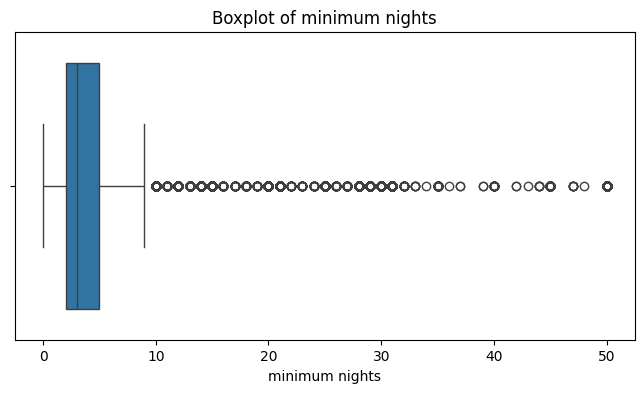



Column: number of reviews
count    98951.000000
mean        26.699609
std         44.512802
min          0.000000
25%          1.000000
50%          7.000000
75%         30.000000
max        232.000000
Name: number of reviews, dtype: float64


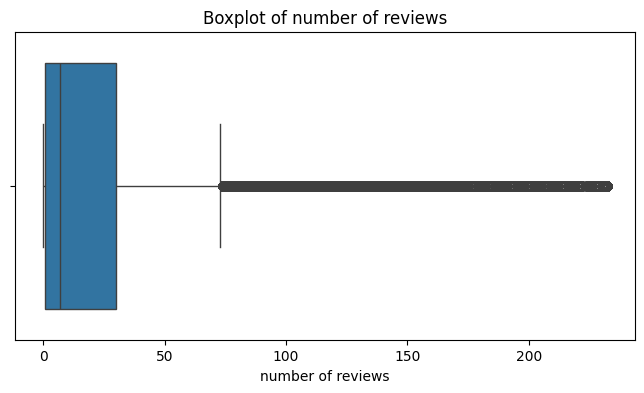



Column: reviews per month
count    98951.000000
mean         1.162471
std          1.686008
min          0.000000
25%          0.090000
50%          0.480000
75%          1.710000
max         90.000000
Name: reviews per month, dtype: float64


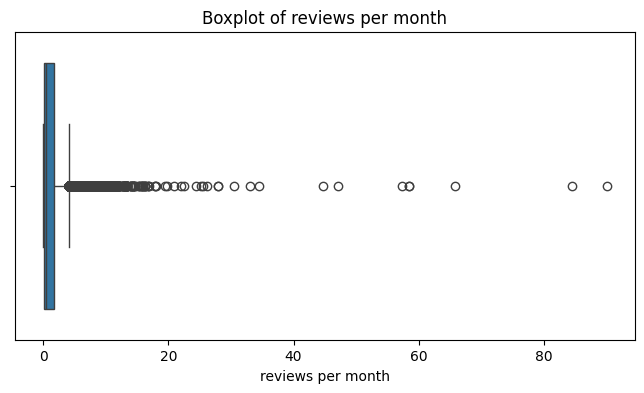



Column: review rate number
count    98951.000000
mean         3.281634
std          1.281656
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: review rate number, dtype: float64


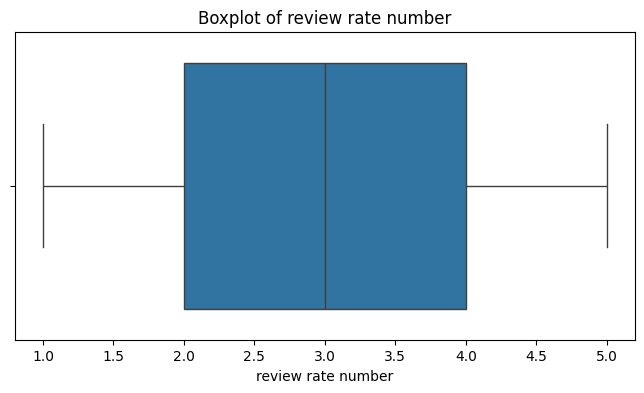



Column: calculated host listings count
count    98951.000000
mean         7.971147
std         32.309719
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        332.000000
Name: calculated host listings count, dtype: float64


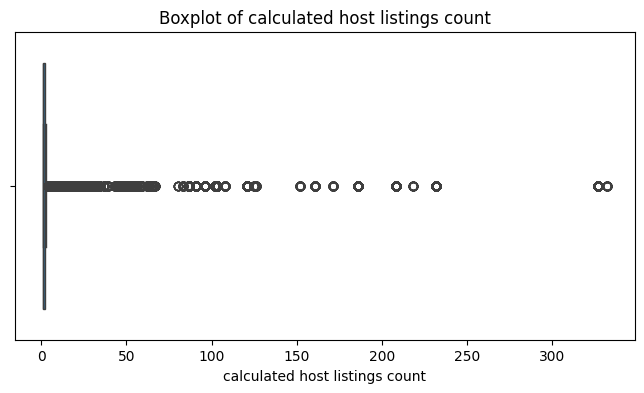



Column: availability 365
count    98951.000000
mean       140.993552
std        133.182120
min          0.000000
25%          4.000000
50%         97.000000
75%        269.000000
max        365.000000
Name: availability 365, dtype: float64


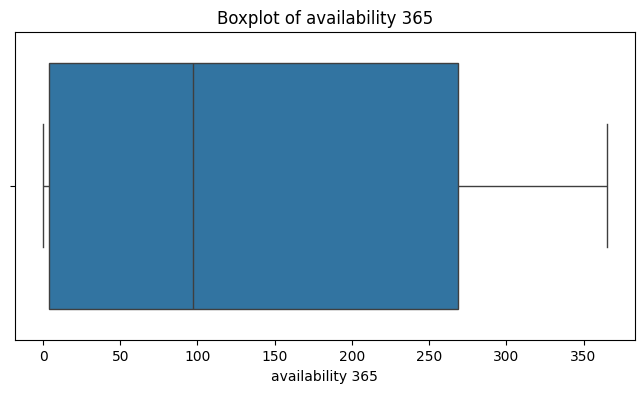



Column: days_since_last_review
count    98951.000000
mean      1937.652757
std        988.869484
min          0.000000
25%       1364.000000
50%       2288.000000
75%       2459.000000
max       4826.000000
Name: days_since_last_review, dtype: float64


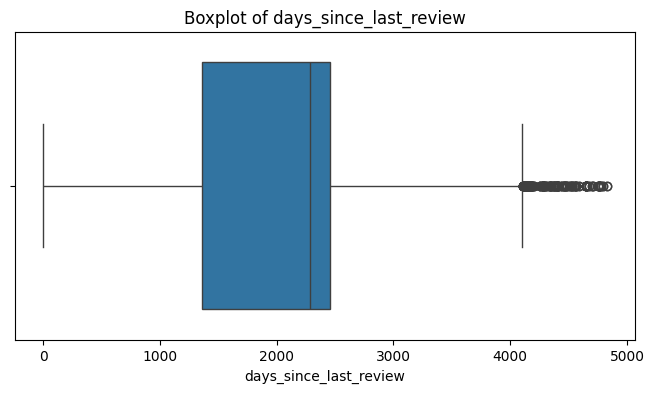



Column: has_review
count    98951.000000
mean         0.844873
std          0.362028
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: has_review, dtype: float64


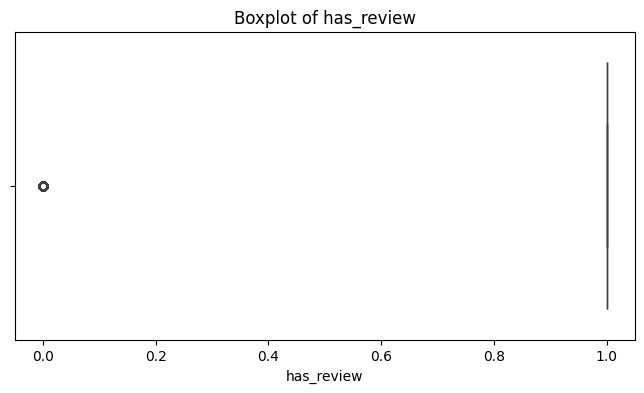



Column: last_review_year
count    98951.000000
mean      1705.809431
std        730.940666
min          0.000000
25%       2017.000000
50%       2019.000000
75%       2019.000000
max       2025.000000
Name: last_review_year, dtype: float64


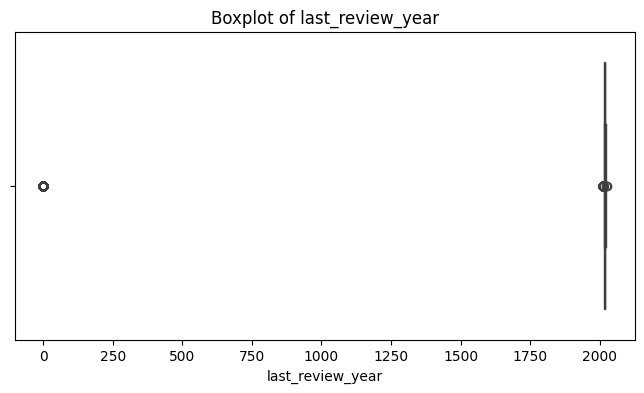



Column: last_review_month
count    98951.000000
mean         4.968762
std          3.506950
min          0.000000
25%          2.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: last_review_month, dtype: float64


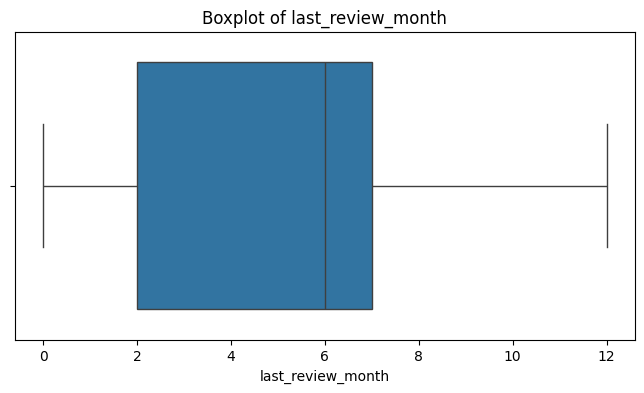



Column: last_review_day
count    98951.000000
mean        13.383523
std         10.693817
min          0.000000
25%          2.000000
50%         13.000000
75%         23.000000
max         31.000000
Name: last_review_day, dtype: float64


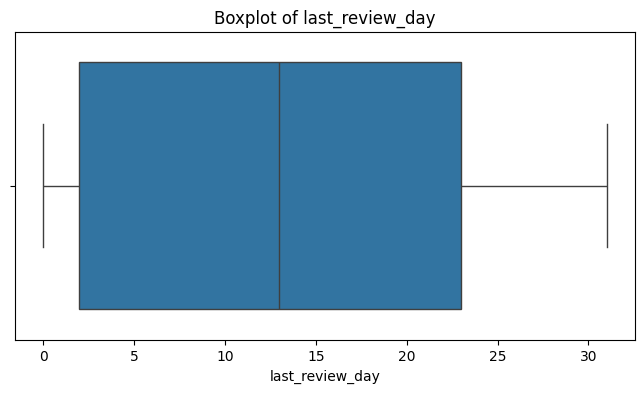



Column: log_minimum_nights
count    9.895100e+04
mean             -inf
std               NaN
min              -inf
25%      1.098612e+00
50%      1.386294e+00
75%      1.791759e+00
max      3.931826e+00
Name: log_minimum_nights, dtype: float64


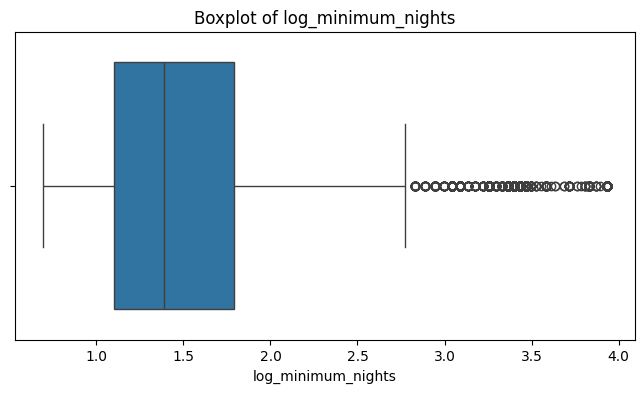



Column: high_minimum_nights
count    98951.000000
mean         0.010318
std          0.101054
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: high_minimum_nights, dtype: float64


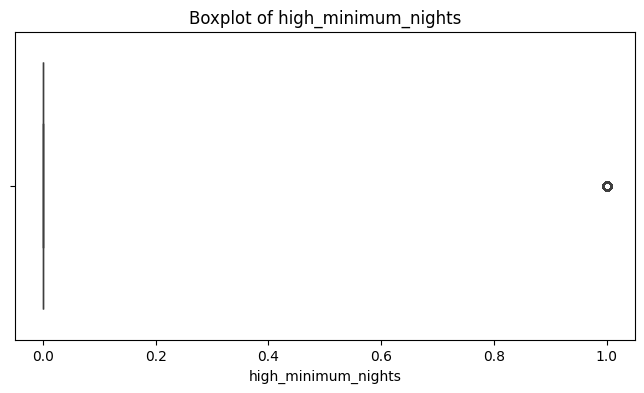

In [287]:
# Checking Outliers through Boxplot

for col in numerical_cols.columns:
    print(f"Column: {col}")
    
    # Summary statistics
    print(df[col].describe())
    
    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    print("\n")

In [288]:
 #Remove Outliers using IQR method
for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

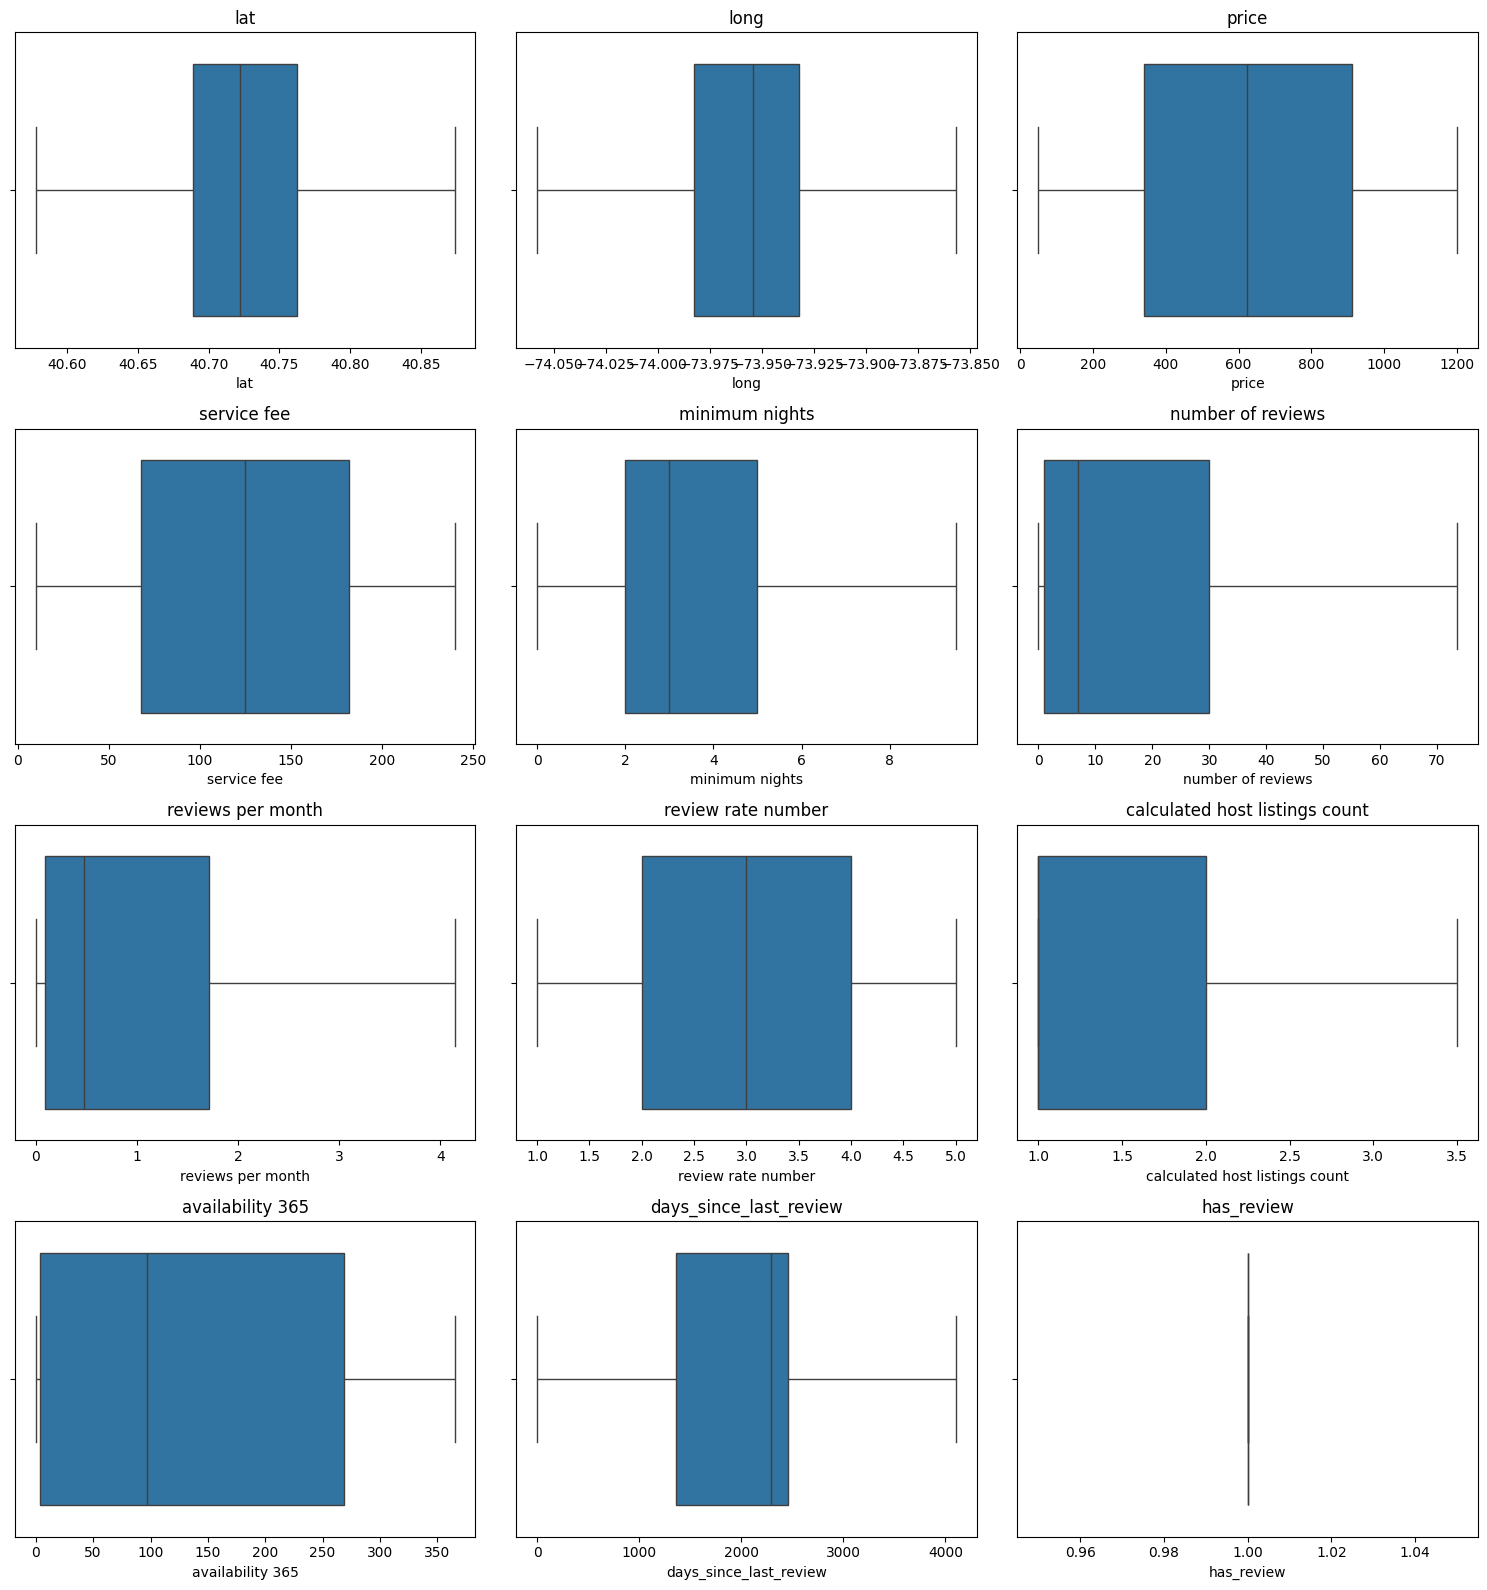

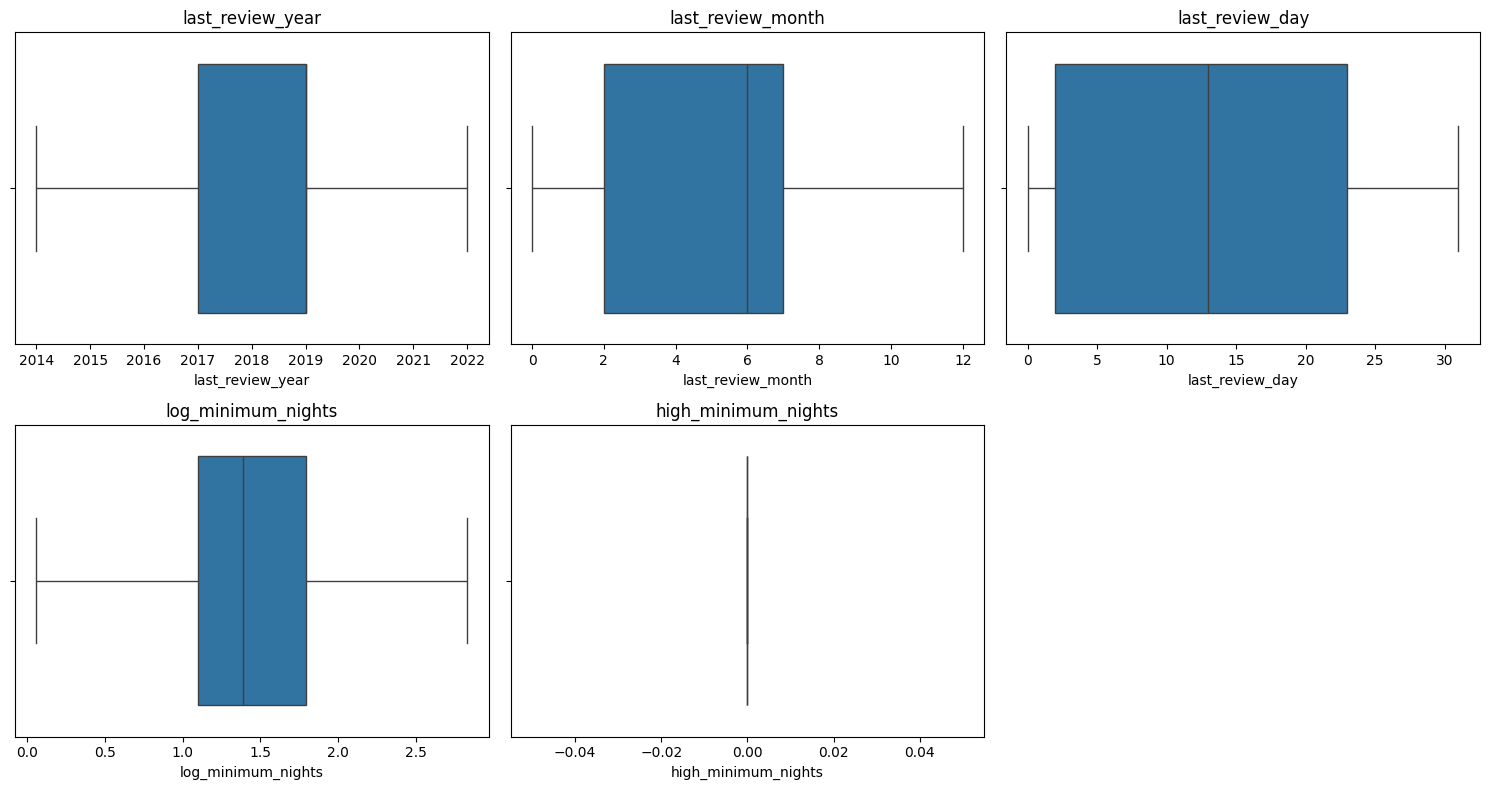

In [289]:
import math

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
batch_size = 12  # 12 columns per figure
num_batches = math.ceil(len(numerical_cols) / batch_size)

for batch in range(num_batches):
    cols_batch = numerical_cols[batch*batch_size : (batch+1)*batch_size]
    rows = math.ceil(len(cols_batch) / 3)
    plt.figure(figsize=(15, rows*4))
    for i, col in enumerate(cols_batch, 1):
        plt.subplot(rows, 3, i)
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='price', ylabel='Count'>

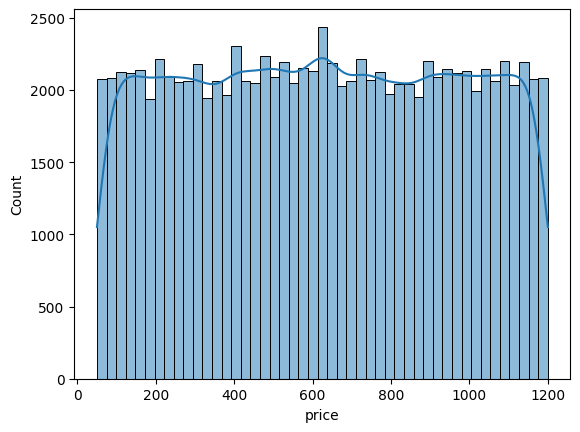

In [290]:
sns.histplot(df['price'], kde=True)


In [291]:
df.groupby('neighbourhood group')['price'].mean().sort_values()


neighbourhood group
manhatan         460.000000
brookln          580.000000
Manhattan        622.713184
Brooklyn         626.407174
Bronx            627.071702
Staten Island    627.266667
Queens           629.565547
unknown          657.172414
Name: price, dtype: float64

In [292]:
# See how many are verified vs not verified
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    49394
verified       49269
unknown          288
Name: count, dtype: int64

In [293]:
# Group by relation between verified and price
df.groupby('host_identity_verified')['price'].mean().sort_values()

host_identity_verified
verified       623.719012
unconfirmed    626.730514
unknown        639.940972
Name: price, dtype: float64

In [294]:
for column in df.columns:
    print("Column Name", column)
    print(df.groupby(column)['price'].mean().sort_values())
    print("--"*60)

Column Name host_identity_verified
host_identity_verified
verified       623.719012
unconfirmed    626.730514
unknown        639.940972
Name: price, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Column Name neighbourhood group
neighbourhood group
manhatan         460.000000
brookln          580.000000
Manhattan        622.713184
Brooklyn         626.407174
Bronx            627.071702
Staten Island    627.266667
Queens           629.565547
unknown          657.172414
Name: price, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Column Name neighbourhood
neighbourhood
Lighthouse Hill                107.666667
Bay Terrace, Staten Island     306.000000
Spuyten Duyvil                 307.000000
Breezy Point                   309.888889
Rossville                      327.500000
                                 ...    

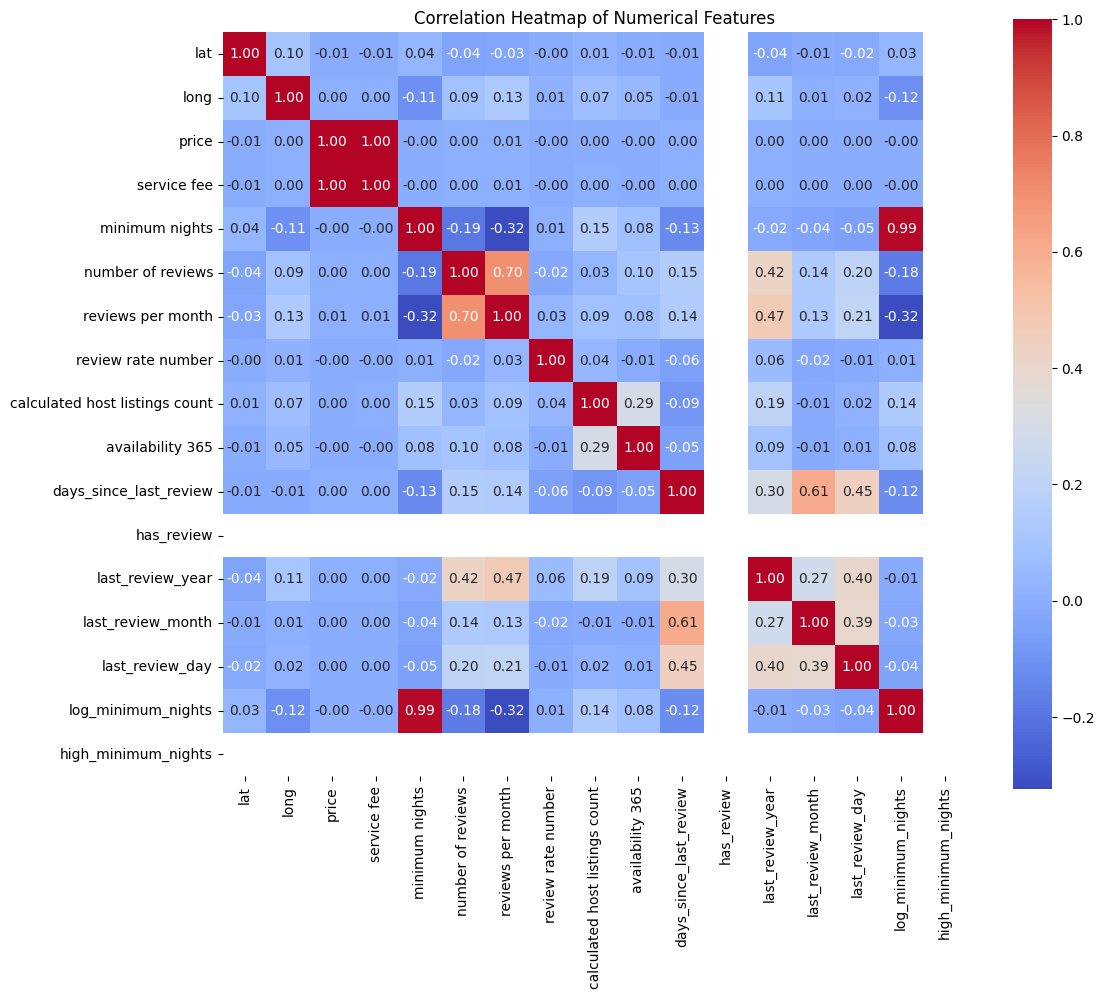

In [295]:
# Select numeric columns as a DataFrame
numerical_df = df.select_dtypes(include=['int64','float64'])

# Compute correlation
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [296]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_df = df.select_dtypes(include=['int64', 'float64'])

scaled_data = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

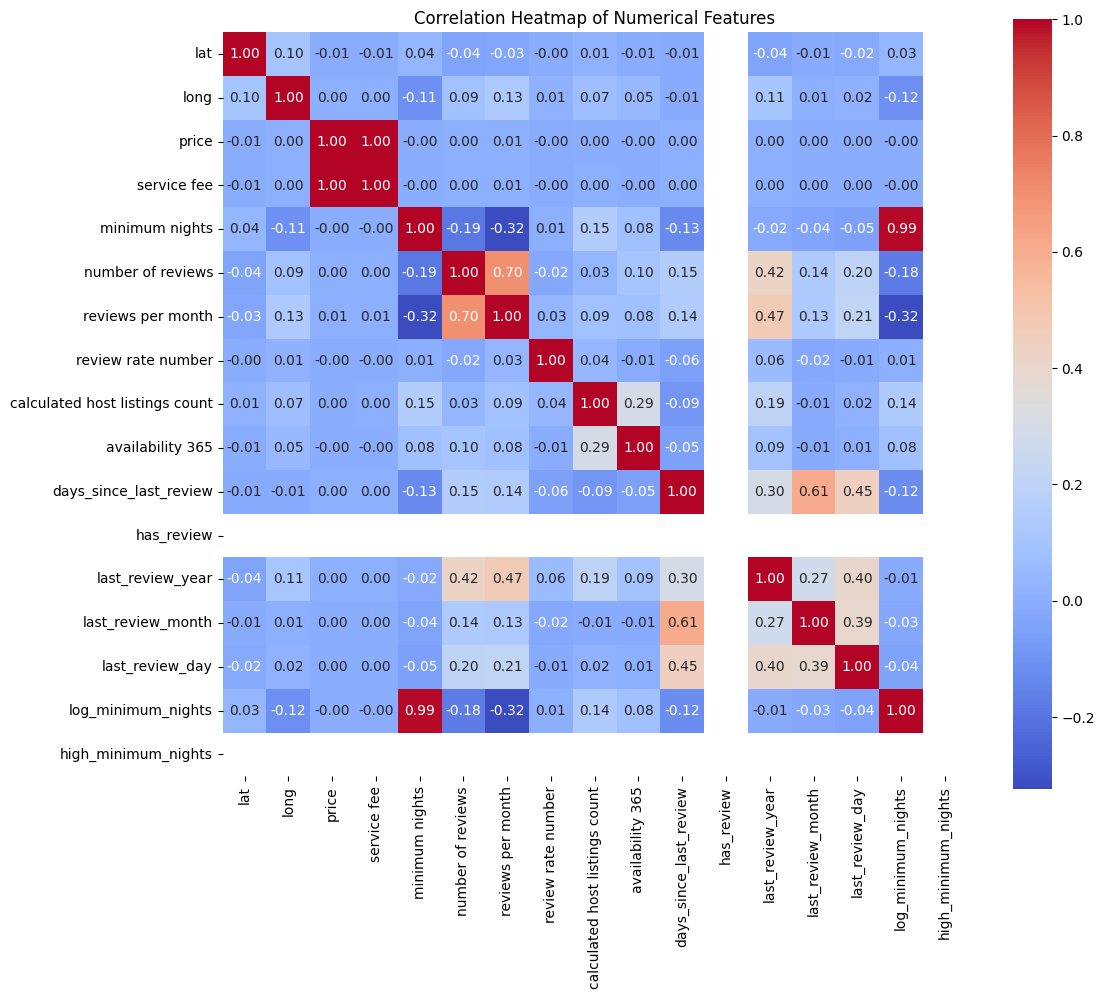

In [297]:
# Select numeric columns as a DataFrame
numerical_df = scaled_df.select_dtypes(include=['int64','float64'])

# Compute correlation
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


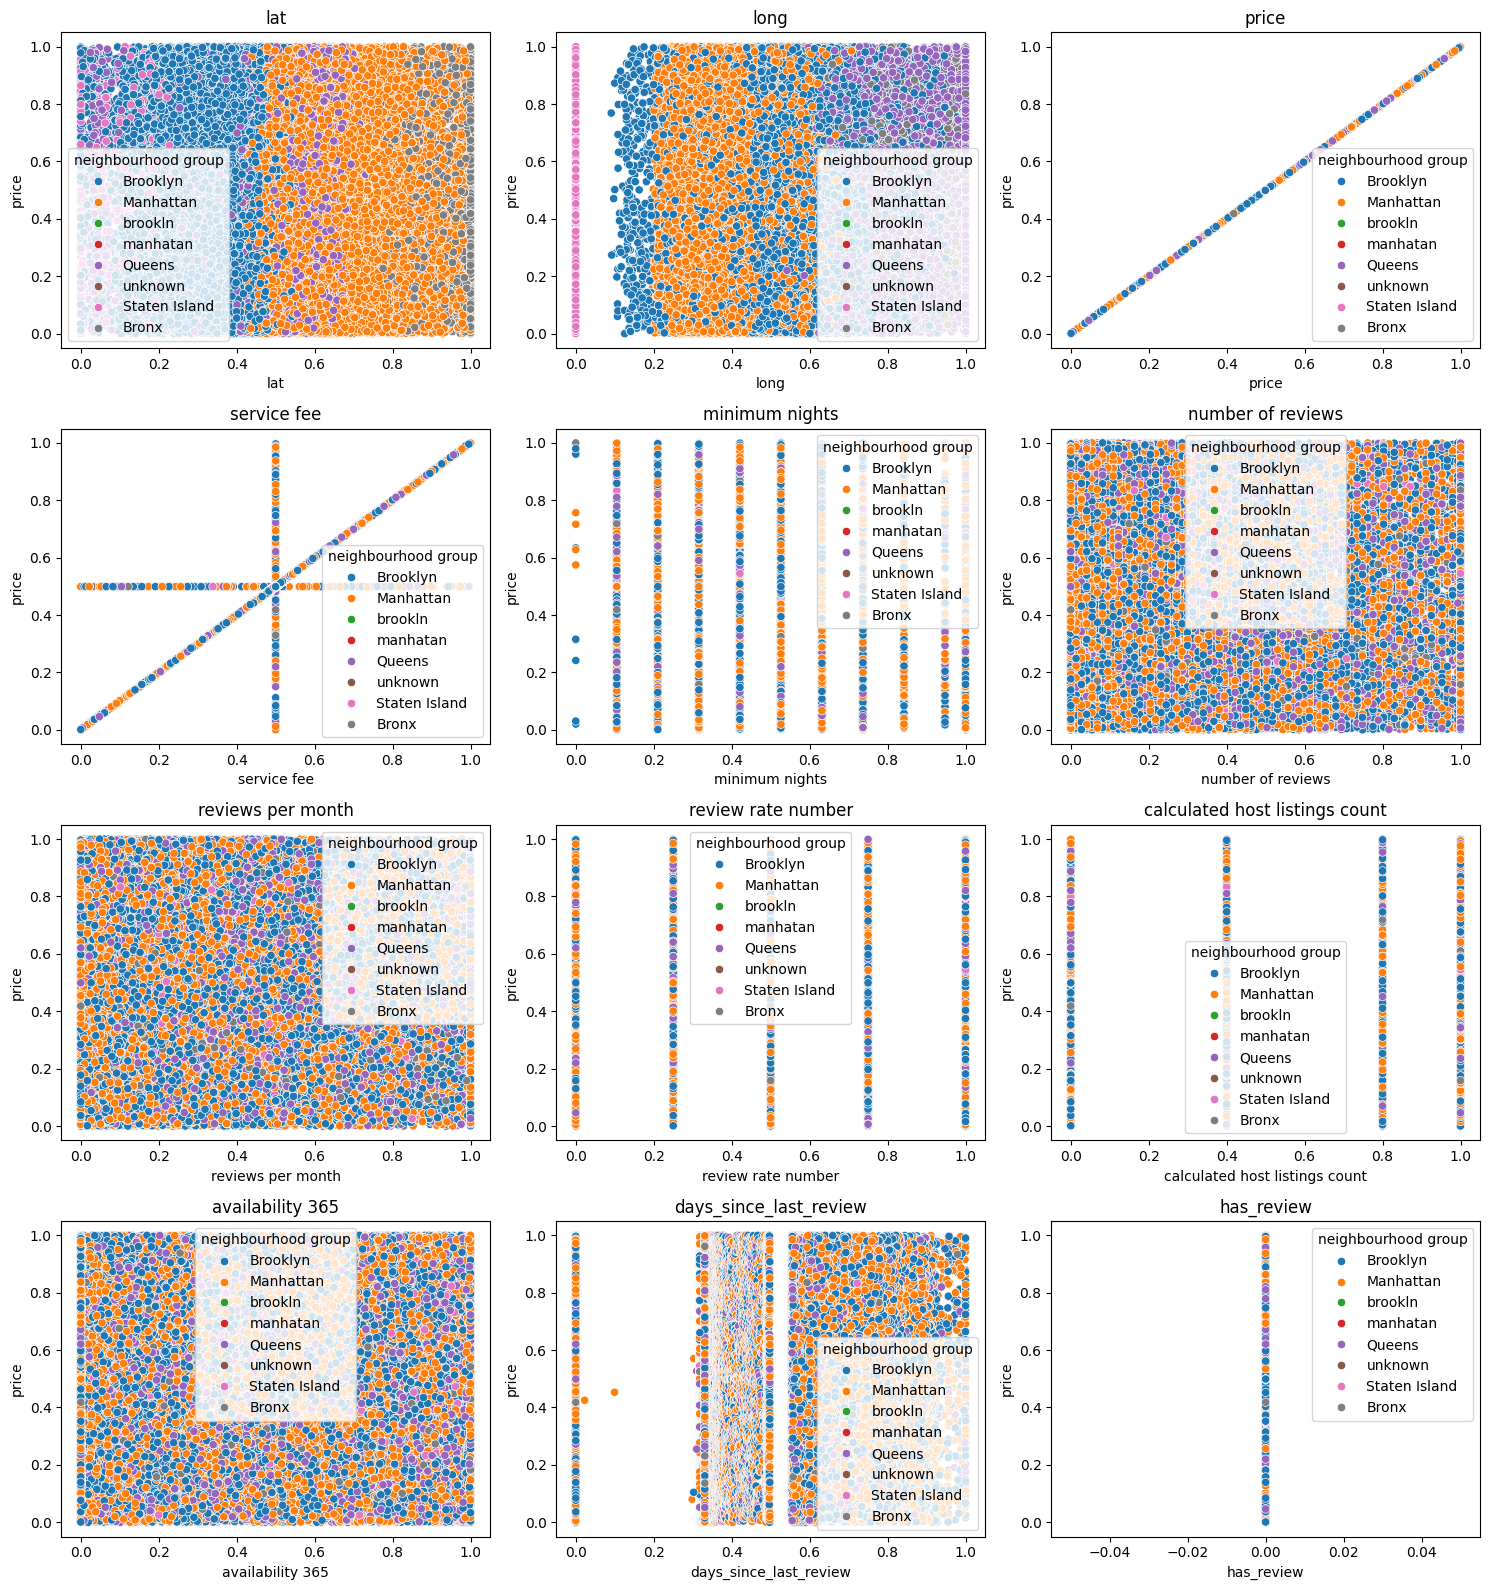

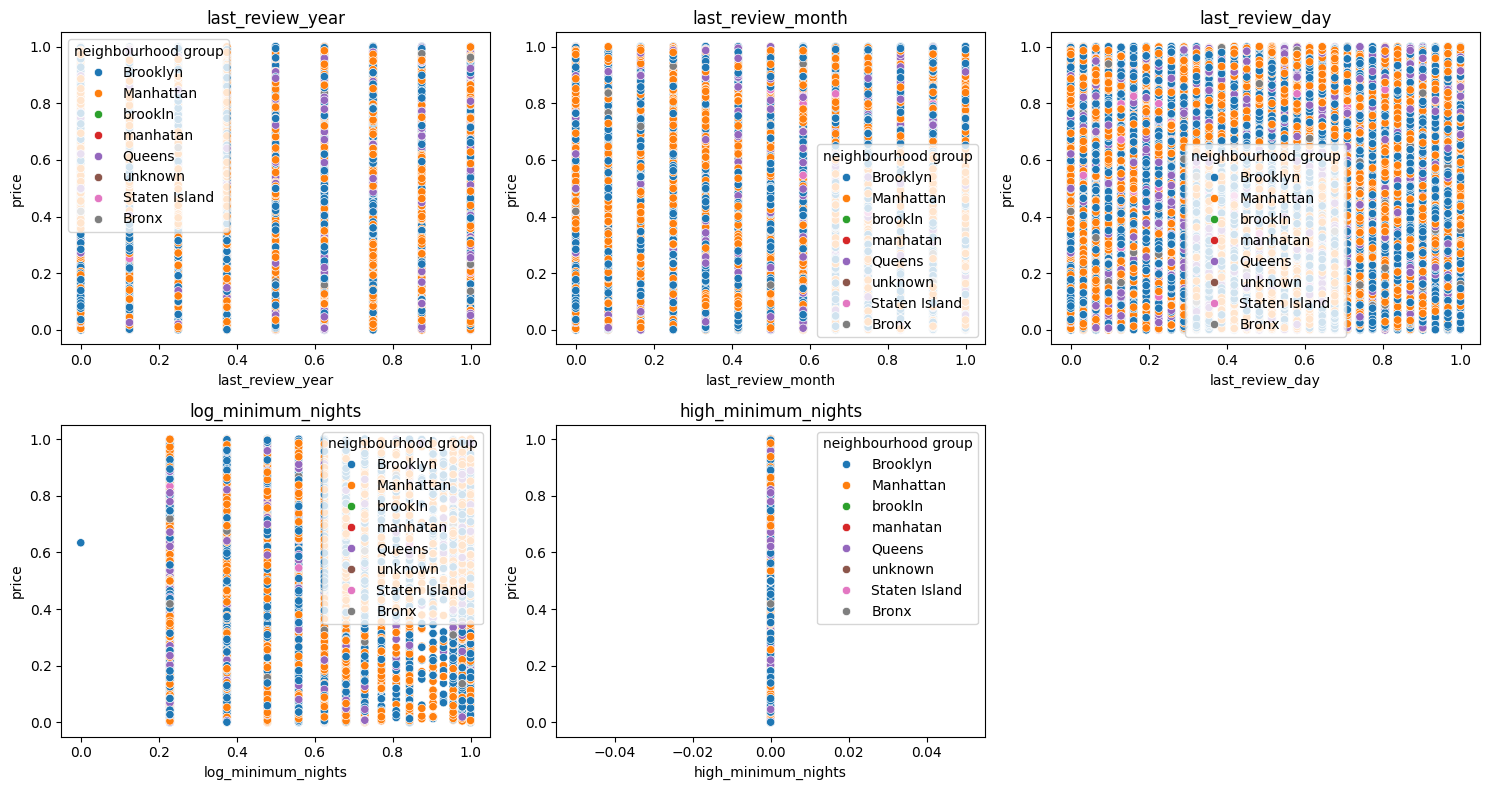

In [308]:
import math

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
batch_size = 12  # 12 columns per figure
num_batches = math.ceil(len(numerical_cols) / batch_size)

for batch in range(num_batches):
    cols_batch = numerical_cols[batch*batch_size : (batch+1)*batch_size]
    rows = math.ceil(len(cols_batch) / 3)
    plt.figure(figsize=(15, rows*4))
    for i, col in enumerate(cols_batch, 1):
        plt.subplot(rows, 3, i)
        sns.scatterplot(x=scaled_df[col], y=scaled_df['price'], hue=df['neighbourhood group'])
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [309]:
df['price'].corr(df['service fee'])

np.float64(0.9977584277808735)

<Axes: xlabel='price', ylabel='service fee'>

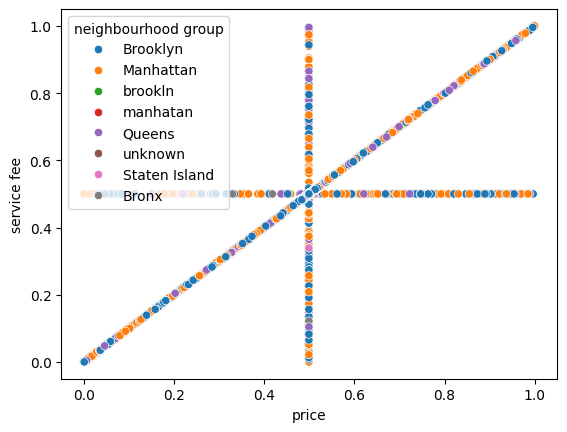

In [302]:
sns.scatterplot(x=scaled_df['price'], y=scaled_df['service fee'],hue=df['neighbourhood group'])

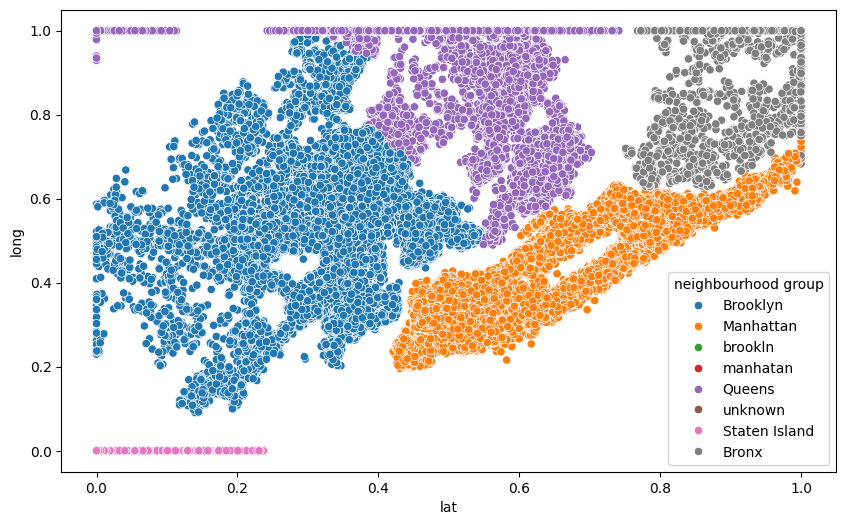

In [304]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=scaled_df['lat'], y=scaled_df['long'],hue=df['neighbourhood group'])
plt.show()

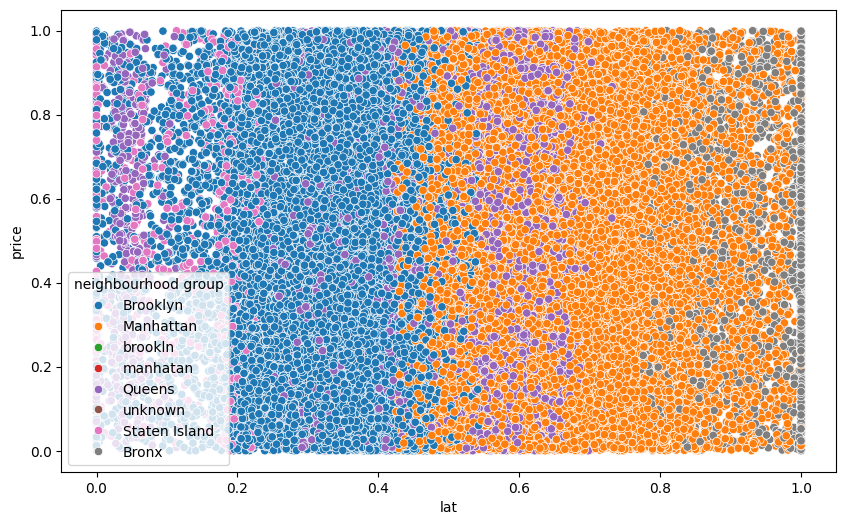

In [305]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=scaled_df['lat'], y=scaled_df['price'],hue=df['neighbourhood group'])
plt.show()

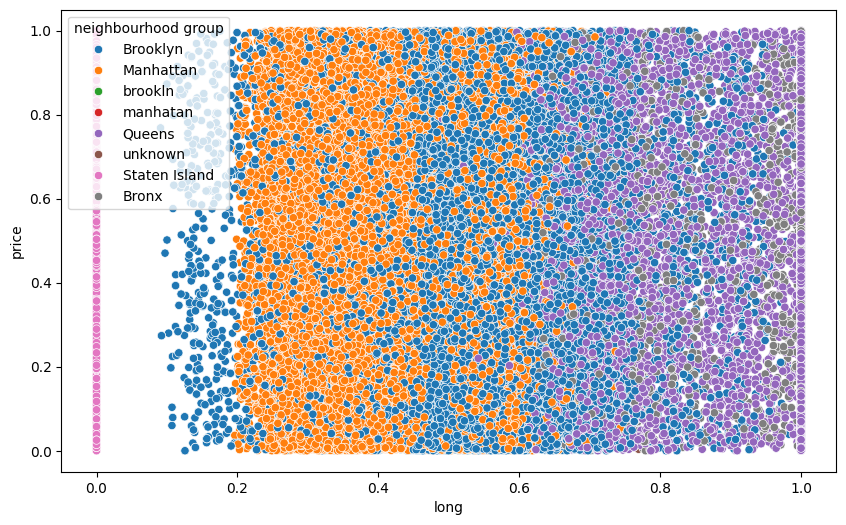

In [306]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=scaled_df['long'], y=scaled_df['price'],hue=df['neighbourhood group'])
plt.show()

In [ ]:
# Group by relation between room type and price
df.groupby('room type')['price'].mean()

room type
Entire home/apt    625.079552
Hotel room         668.465517
Private room       625.005069
Shared room        634.095687
Name: price, dtype: float64

<Axes: xlabel='room type', ylabel='price'>

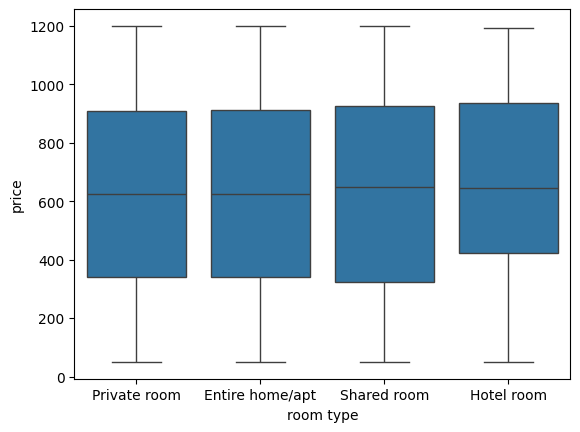

In [171]:
# Above groupby reslt in Box Plot
sns.boxplot(x='room type', y='price', data=df)


In [165]:
numerical_df

lat      long   price  service fee  minimum nights  \
0       40.64749 -73.97237   966.0        193.0             9.5   
1       40.75362 -73.98377   142.0         28.0             9.5   
2       40.80902 -73.94190   620.0        124.0             3.0   
3       40.68514 -73.95976   368.0         74.0             9.5   
4       40.79851 -73.94399   204.0         41.0             9.5   
...          ...       ...     ...          ...             ...   
102594  40.70862 -73.94651   844.0        169.0             1.0   
102595  40.80460 -73.96545   837.0        167.0             1.0   
102596  40.67505 -73.98045   988.0        198.0             3.0   
102597  40.74989 -73.93777   546.0        109.0             2.0   
102598  40.76807 -73.98342  1032.0        206.0             1.0   

        number of reviews  reviews per month  review rate number  \
0                     9.0               0.21                 4.0   
1                    45.0               0.38                 4.0   
2                     0.0               0.00                 5.0   
3                    73.5               4.14                 4.0   
4                     9.0               0.10                 3.0   
...                   ...                ...                 ...   
102594                0.0               0.00                 3.0   
102595                1.0               0.02                 2.0   
102596                0.0               0.00                 5.0   
102597                5.0               0.10                 3.0   
102598                0.0               0.00                 3.0   

        calculated host listings count  availability 365  log_minimum_nights  \
0                                  3.5             286.0            2.397895   
1                                  2.0             228.0            2.831480   
2                                  1.0             352.0            1.386294   
3                                  1.0             322.0            2.831480   
4                                  1.0             289.0            2.397895   
...                                ...               ...                 ...   
102594                             1.0             227.0            0.693147   
102595                             2.0             395.0            0.693147   
102596                             1.0             342.0            1.386294   
102597                             1.0             386.0            1.098612   
102598                             1.0              69.0            0.693147   

        high_minimum_nights  has_reviews  days_since_last_review  has_review  \
0                         0            1                    1439           1   
1                         0            1                    1225           1   
2                         0            1                       0           1   
3                         0            1                    2276           1   
4                         0            1                    2504           1   
...                     ...          ...                     ...         ...   
102594                    0            1                       0           1   
102595                    0            1                    3736           1   
102596                    0            1                       0           1   
102597                    0            1                    3639           1   
102598                    0            1                       0           1   

        last_review_year  last_review_month  last_review_day  
0                 2020.5               10.0             19.0  
1                 2020.5                5.0             21.0  
2                    NaN                NaN              NaN  
3                 2019.0                7.0              5.0  
4                 2018.0               11.0             19.0  
...                  ...                ...              ...  
102594               NaN    

* Replace the incorrect spelling with correct spellling in neighbourhood group

In [313]:
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
})


In [314]:
arrn = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
arrn

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.350151
                    Private room               3.336218
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.255127
                    Hotel room                 3.857143
                    Private room               3.267324
                    Shared room                3.352273
Manhattan           Entire home/apt            3.278924
                    Hotel room                 3.500000
                    Private room               3.277113
                    Shared room                3.253440
Queens              Entire home/apt            3.348767
                    Hotel room                 3.750000
                    Private room               3.317188
                    Shared room                3.357143
Staten Island       Entire home/apt            3.328261
                    Private room               3.486364
                    Shared room                3.533333
unknown             Entire home/apt            3.181818
                    Private room               3.222222

In [147]:
df.columns

Index(['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'lat',
       'long', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',
       'log_minimum_nights', 'high_minimum_nights', 'has_reviews',
       'days_since_last_review', 'has_review', 'last_review_year',
       'last_review_month', 'last_review_day'],
      dtype='object')